In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Flight Price Prediction

# Test set for prediction

In [2]:
data_test=pd.read_excel(r"C:\Users\A\Desktop\data trained\DATA SCIENCE CURRICULUM\Data TRained projects ML\Evaluation phase\incomimg\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


#  Training datatset

In [3]:
df=pd.read_excel(r"C:\Users\A\Desktop\data trained\DATA SCIENCE CURRICULUM\Data TRained projects ML\Evaluation phase\incomimg\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

* Dataset contains 10683 rows datapoints and 11 columns or variables.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


1] There are only two records are missing one in Route and one in Duration which have to eliminate. 

2] All variables are of Object data types.

3] Price variable which is target is numeric  

* Descriptive statstics

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.isna().sum().sum()

2

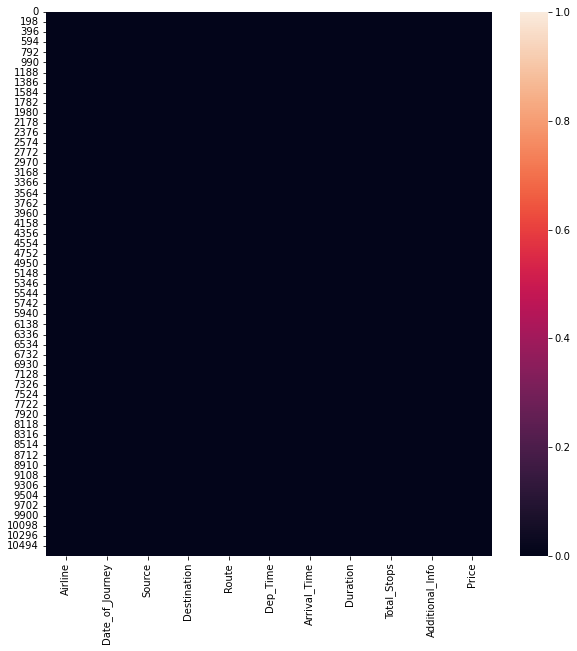

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

* There are only two null values in dataset.

In [10]:
df=df.dropna()


In [11]:
df.shape

(10682, 11)

* Number of categories in variables .

In [12]:
for i in df.columns:
    print(i,":\n")
    print(len(df[i].unique()))
    print('______________________________\n')

Airline :

12
______________________________

Date_of_Journey :

44
______________________________

Source :

5
______________________________

Destination :

6
______________________________

Route :

128
______________________________

Dep_Time :

222
______________________________

Arrival_Time :

1343
______________________________

Duration :

368
______________________________

Total_Stops :

5
______________________________

Additional_Info :

10
______________________________

Price :

1870
______________________________



* Unique Values and Thier counts.

In [13]:
for i in df.columns:
    print(i,"\n")
    print(df[i].unique())
    print('----------------------------------\n')
    print(df[i].value_counts(),'\n')
    print('----------------------------------\n')

Airline 

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
----------------------------------

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 

----------------------------------

Date_of_Journey 

['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04

* Since Route feature has lots of categories ,It is not possible to analyse them There are such categories which are not in Train data but In test data which are as given follow. These categories cannot be evaluated after encoding.

In [14]:
routelist=[]
for i in data_test['Route'].unique():
    if str(i) not in df['Route'].unique():
        routelist.append(i)
routelist        

['BLR → TRV → DEL',
 'CCU → IXR → BBI → BOM → BLR',
 'BOM → VGA → TIR → HYD',
 'BOM → IXC → DEL → HYD']

Feature Manipulation :


    1] There are 10 categories in Additional_info feature within which No Info and No info categories have same categories defining that there is no additional information about traveling facilities.so these categories can be merge into onecategory and treated as one .
          a) I will replace 'No Info' with 'No info

    2] Date_of _journey feature has information about departure date of flight. These date of journey can be used for extracting variation in  price of ticket due to change in date, month, Quarter of year, day of week  so Date of Journey will be used for extraction of  day of week, week of year, month , date of month, Quarter of year

    3] Dep_Time can be divided into hour of time and minute of time as time can not be treated as variable.
    if Time with Hour and Minute in single feature  as categorical variable then it will required 1440 (24 multiplied by 60 ) categories

    4]  Arrival_Time can be divided into hour of time and minute of time as time can not be treated as variable.
    if Time with Hour and Minute in single feature  as categorical variable then it will required 1440 (24 multiplied by 60 ) categories
    5] Arrival_time can be on same day to reach destination or it can be next day or may be daya after tomorrow So we will extract this information from Arrival_Time feature and Prepared new feature  for analysis.
    The New feature will have two categories Sameday nad Notsameday
     
    6] Duration is time required to reach destination from Source.Duration feature is string having format of xh ym this string canbe used for creating duration feature  in minutes with help of string manipuation method.



# 1] Replacing No Info with No info category in Additional_Info  variable.

In [15]:
df["Additional_Info"].replace('No Info','No info',inplace=True)

In [16]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [17]:
df['Additional_Info'].value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

# 2] Date_of _journey into day of week, week of year, month , date of month, Quarter of year

In [18]:
df['Datetime'] = pd.to_datetime(df['Date_of_Journey'],dayfirst=True,yearfirst=False)


In [19]:
df['date']=df['Datetime'].dt.day

In [20]:
df['Quarter']=df['Datetime'].dt.quarter

In [21]:
df['Month']=df['Datetime'].dt.month

In [22]:
df['day']=df['Datetime'].dt.day_name()
df['week']=df['Datetime'].dt.week

In [23]:
df[['Datetime','Date_of_Journey','date','Quarter','Month','day','week']][0:11]

,Datetime,Date_of_Journey,date,Quarter,Month,day,week
0,2019-03-24,24/03/2019,24,1,3,Sunday,12
1,2019-05-01,1/05/2019,1,2,5,Wednesday,18
2,2019-06-09,9/06/2019,9,2,6,Sunday,23
3,2019-05-12,12/05/2019,12,2,5,Sunday,19
4,2019-03-01,01/03/2019,1,1,3,Friday,9
5,2019-06-24,24/06/2019,24,2,6,Monday,26
6,2019-03-12,12/03/2019,12,1,3,Tuesday,11
7,2019-03-01,01/03/2019,1,1,3,Friday,9
8,2019-03-12,12/03/2019,12,1,3,Tuesday,11
9,2019-05-27,27/05/2019,27,2,5,Monday,22


1] date,Quarter, Month,day,week  feature will be tereated as categorical features model.

2] date is discrete in nature.

# 3 ]  Deptime into Hour and minute sepration

In [24]:
df['Dep_hour']=(pd.to_datetime(df['Dep_Time'])).dt.hour
df['Dep_min']=(pd.to_datetime(df['Dep_Time'])).dt.minute

In [25]:
df[['Dep_Time','Dep_hour','Dep_min']][0:10]

,Dep_Time,Dep_hour,Dep_min
0,22:20,22,20
1,05:50,5,50
2,09:25,9,25
3,18:05,18,5
4,16:50,16,50
5,09:00,9,0
6,18:55,18,55
7,08:00,8,0
8,08:55,8,55
9,11:25,11,25


1] Dep_hour wil be treated as  categorical as we are using Dep_minute as seprate variable.

2] Hours with seprate varibles for  minute and seconds are discrete in nature.

# 4]  & 5]  Arrival time hour and minute sepration 

In [26]:
df['Arrival_Hour'] = (pd.to_datetime(df['Arrival_Time'])).dt.hour
df['Arrival_min'] = (pd.to_datetime(df['Arrival_Time'])).dt.minute


In [27]:
def arr(i):
     if len(i)>5:
        return ('Not sameday')
     else:
        return ('Sameday')
 


In [28]:
df['Arrival_day']=df['Arrival_Time'].apply(arr)

In [29]:
df['Arrival_day'].value_counts()

Sameday        6348
Not sameday    4334
Name: Arrival_day, dtype: int64

1] Arrival_hour wil be treated as categorical as we are using Arrival_minute as seprate variable.

2] Hours with seprate varibles for minute and seconds are discrete in nature.

# 6] duration in minutes.

In [30]:
def dur(i):
    return eval(i.replace('h','*60').replace(' ','+').replace('m',''))

In [31]:
df['Duration']=df['Duration'].apply(dur)

* Eliminating unneccesary features

1] we have created hour and Minute from Dep_Time , So it will be removed.

2]  we have created hour and Minute from Arrival_Time , So it will be removed.

3] Also eliminating Day_of_Journey and  Datetime features.  

* After Feature manipuation and creation

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  object        
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  int64         
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
 11  Datetime         10682 non-null  datetime64[ns]
 12  date             10682 non-null  int64         
 13  Quarter          10682 non-null  int64         
 14  Month            10682 non-null  int64

* Descriptive stats.

In [33]:
df.describe()

,Duration,Price,date,Quarter,Month,week,Dep_hour,Dep_min,Arrival_Hour,Arrival_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,643.020502,9087.214567,13.509081,1.744992,4.708575,18.413687,12.491013,24.409287,13.349186,24.690601
std,507.830133,4611.548810,8.479363,0.435886,1.164408,5.227373,5.748820,18.767801,6.859317,16.506808
min,5.000000,1759.000000,1.000000,1.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,5277.000000,6.000000,1.000000,3.000000,13.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,8372.000000,12.000000,2.000000,5.000000,20.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,12373.000000,21.000000,2.000000,6.000000,23.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,79512.000000,27.000000,2.000000,6.000000,26.000000,23.000000,55.000000,23.000000,55.000000


1]  Duration has min value of 5 minute  and Maximum is 2860 minute (Approx 2 days).

2] 75% data in Duration feature is upto 930 minute (Approx 15 hours) 

3] Rrange of dates of flights are 1 to 27 

4] All data is between 2  quarter of year as all databelongs to march to june .



* Eliminatiing Unwanted features from dataset.

In [34]:
df=df.drop(columns=['Date_of_Journey','Datetime','Dep_Time','Arrival_Time'],axis=1)
df.shape

(10682, 18)

* Anlysing missing data after treatment

In [35]:
df.isna().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
date               0
Quarter            0
Month              0
day                0
week               0
Dep_hour           0
Dep_min            0
Arrival_Hour       0
Arrival_min        0
Arrival_day        0
dtype: int64

* seprating numeric and object datatype of columns

In [36]:
num=[]
obj=[]
for i in df.columns:
    if df[i].dtype==np.object:
        obj.append(i)
    else:
        num.append(i)
print('number of Numeric variable :',len(num))
print('Numeric varibales :\n\n',num)
print("-----------------------------------------------------------------------")
print('number of object datatype  variable :',len(obj))
print('object datatype varibales :\n\n',obj)

number of Numeric variable : 10
Numeric varibales :

 ['Duration', 'Price', 'date', 'Quarter', 'Month', 'week', 'Dep_hour', 'Dep_min', 'Arrival_Hour', 'Arrival_min']
-----------------------------------------------------------------------
number of object datatype  variable : 8
object datatype varibales :

 ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info', 'day', 'Arrival_day']


* Distribution of numeric variables

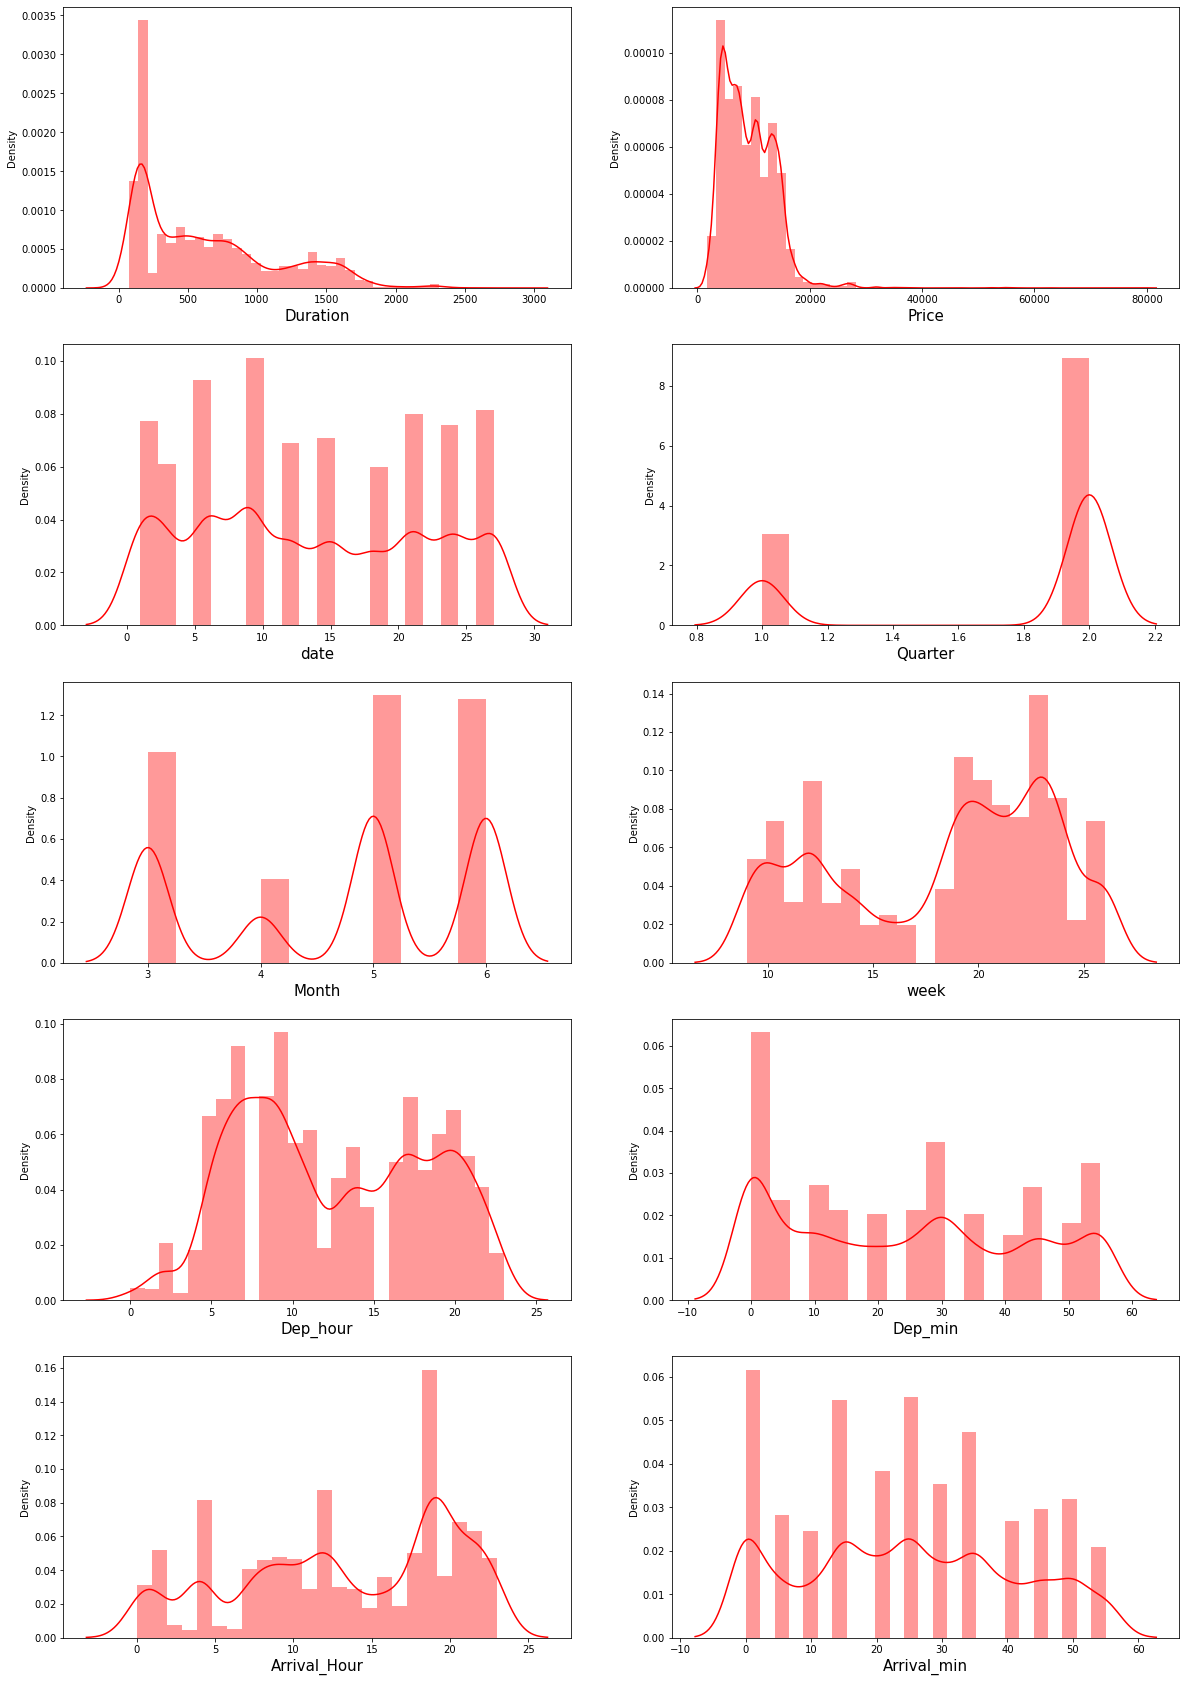

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in num:
    if graph<=len(num):
        ax=plt.subplot(5,2,graph)
        sns.distplot(df[column],color='red')
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

1] Price and Duration variables have continuous distribution on X axis, All remaining numerical fearures are categorical in nature.
 As they are exhibiting discrete distribution on X axis.
    
2] Duration feature has right skewed distribution    

3] Price has slightly skewed distribution which is accepatable .

4] Month and week are categorical .

5] Dep_hour Arrival_hour ,Dep_hour and Dep_min will be treated as categorical .

* counting of categories in variables.

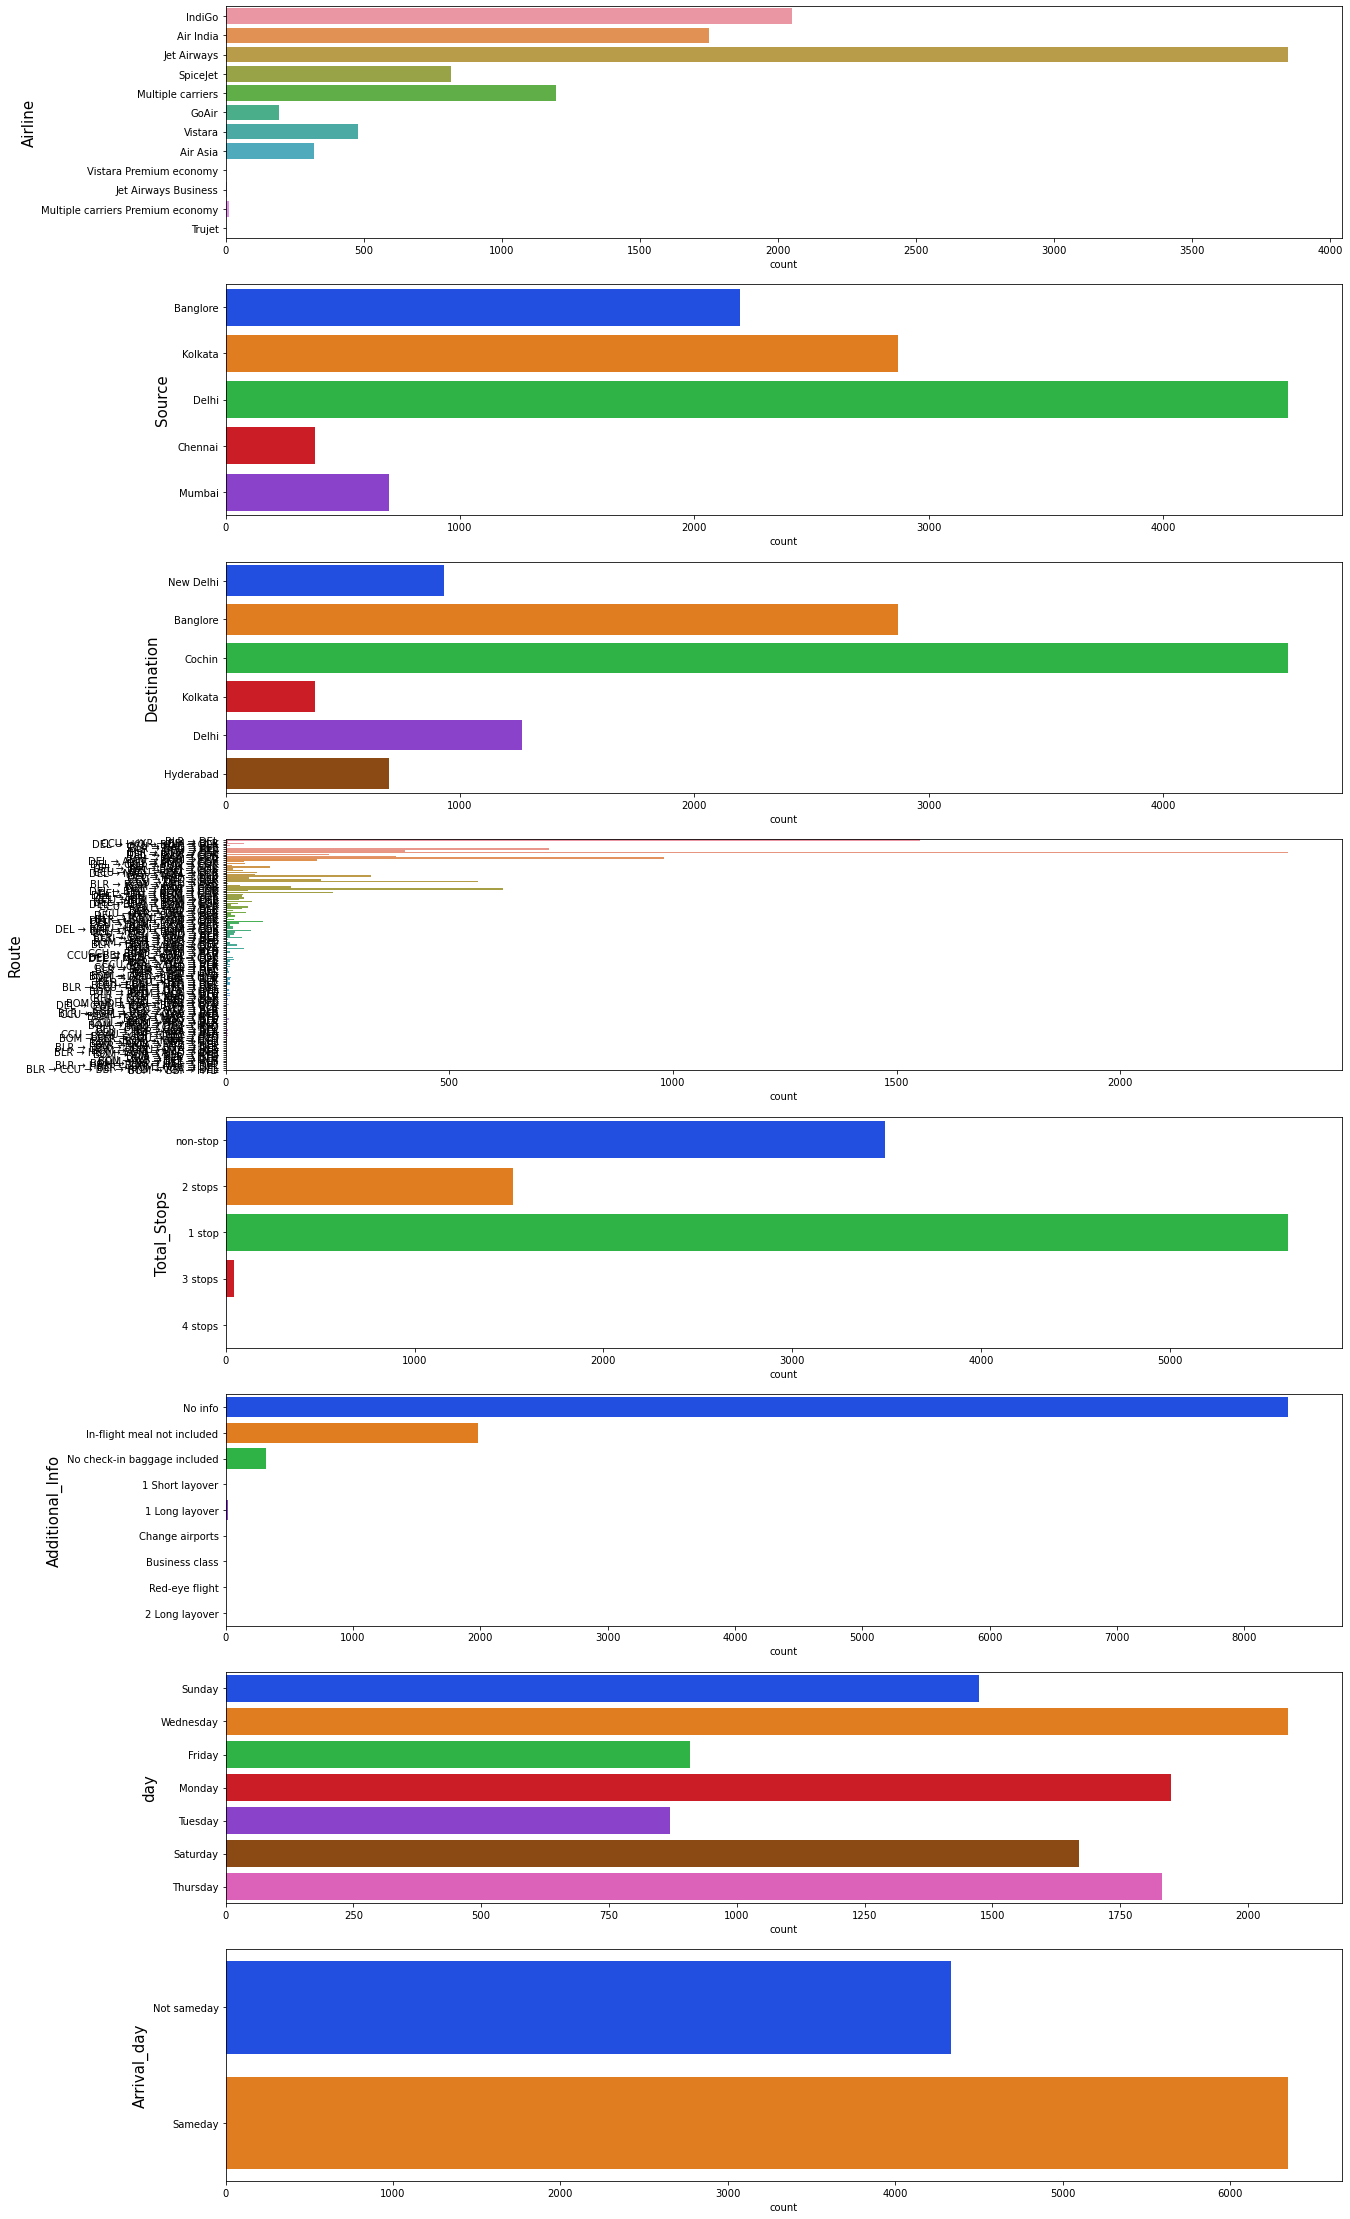

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(20,40))
sns.set_palette('bright')
graph=1

for column in obj:
    if graph<=len(obj):
        ax=plt.subplot(8,1,graph)
        sns.countplot(y=df[column])
        plt.ylabel(column,fontsize=15)
        plt.yticks()
        
    graph+=1
plt.show()
plt.tight_layout()

* Count of categories can be observe for each features can be observe .

1] Airline :
    
    a] Jet Airways has maximum number counts in Airline feature.
    
    b] Vistara Premium Economy , Jet Airways Bussines , Multiple carriers Premium Economy and trujet have  lowest count in datastet upto 5 .
    
2] Source :
     
    1] Source has flight departure locations Mumbai,Delhi , Chennai, Bangaluru and Kolkata within which There high amount of flights from Delhi.
    
    2] There are very less amount of flights which are from Chennai.
    
    3] Mumbai also has nearly same number  of flight as Chennai.
    
3] Destination:

    1] Destination has flight Arrival locations Cochin,Delhi , New Delhi , Hydrabad, Bangaluru and Kolkata within which There higher number of  flights tickets  for  Delhi .
    
    2] There are very less number  of flight tickets which are for  Kolkata  destination.
    
4] Total Stops :

    1] Maximum number of flights with only one stop
    
    2] The number of flights 3 or more than 3  is very less 
    
    3] mostly data contains flights with one stop and non stop .
    
    

* Count plot for Route feature.

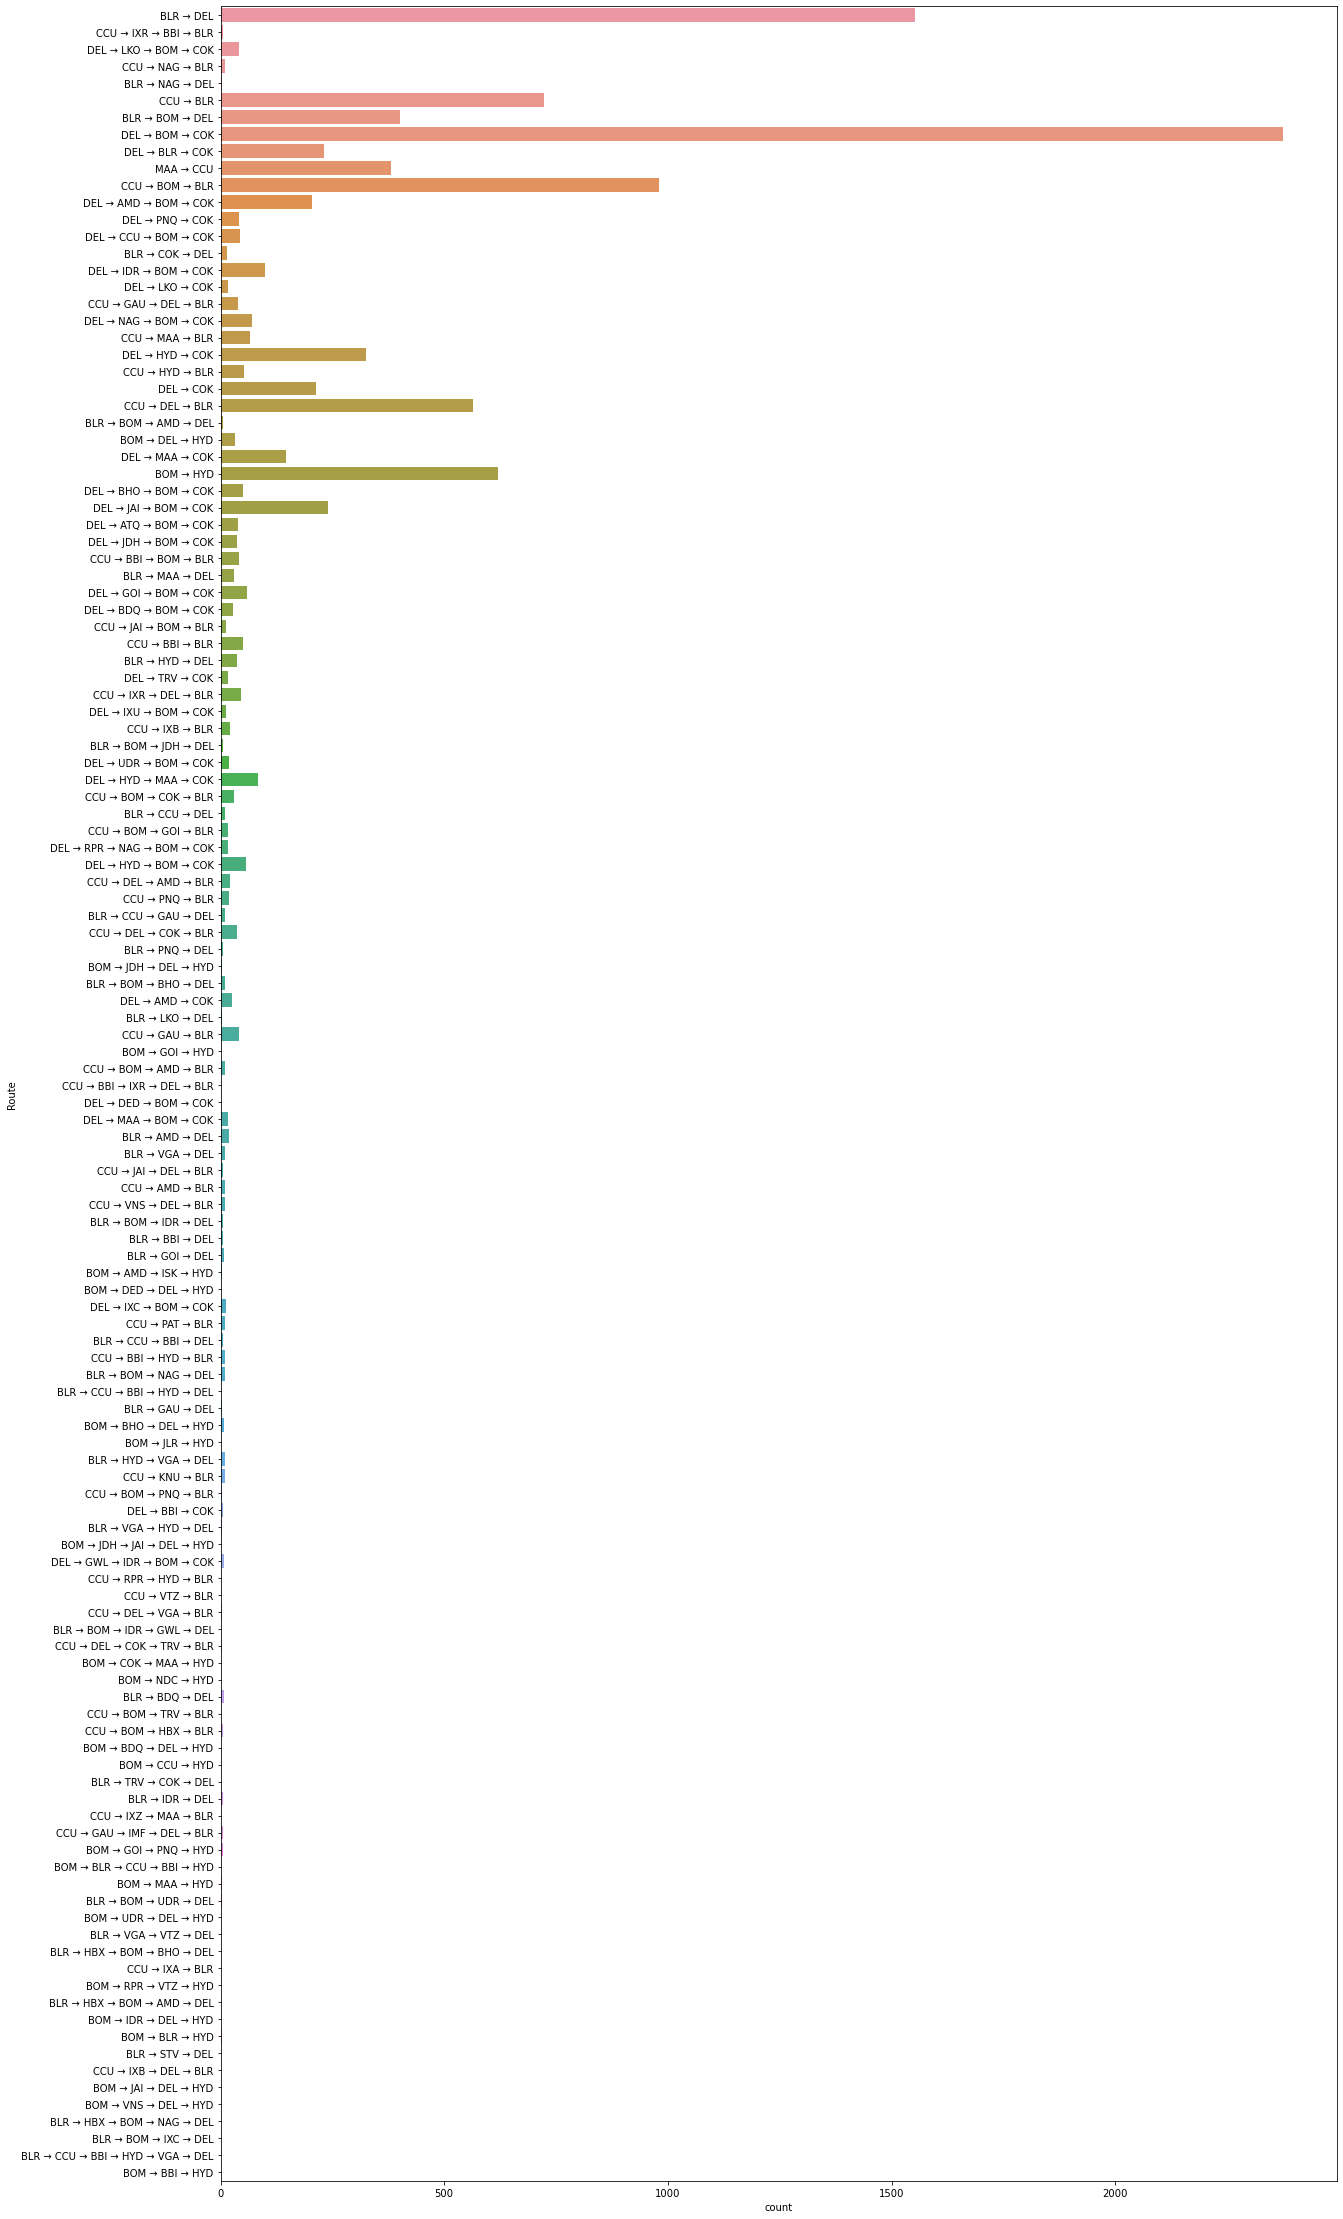

In [39]:
plt.figure(figsize=(20,40))
sns.countplot(y=df['Route'])
plt.show()

1] There are more than 2000 thosands flights from BLR-BOM-DEL Route 

2] Thre are upto 1500 flighhts with BLR-DEL Non stop route.

3] Other categories have less amount. some have 1 count .

* Percentage of catergories in variables.

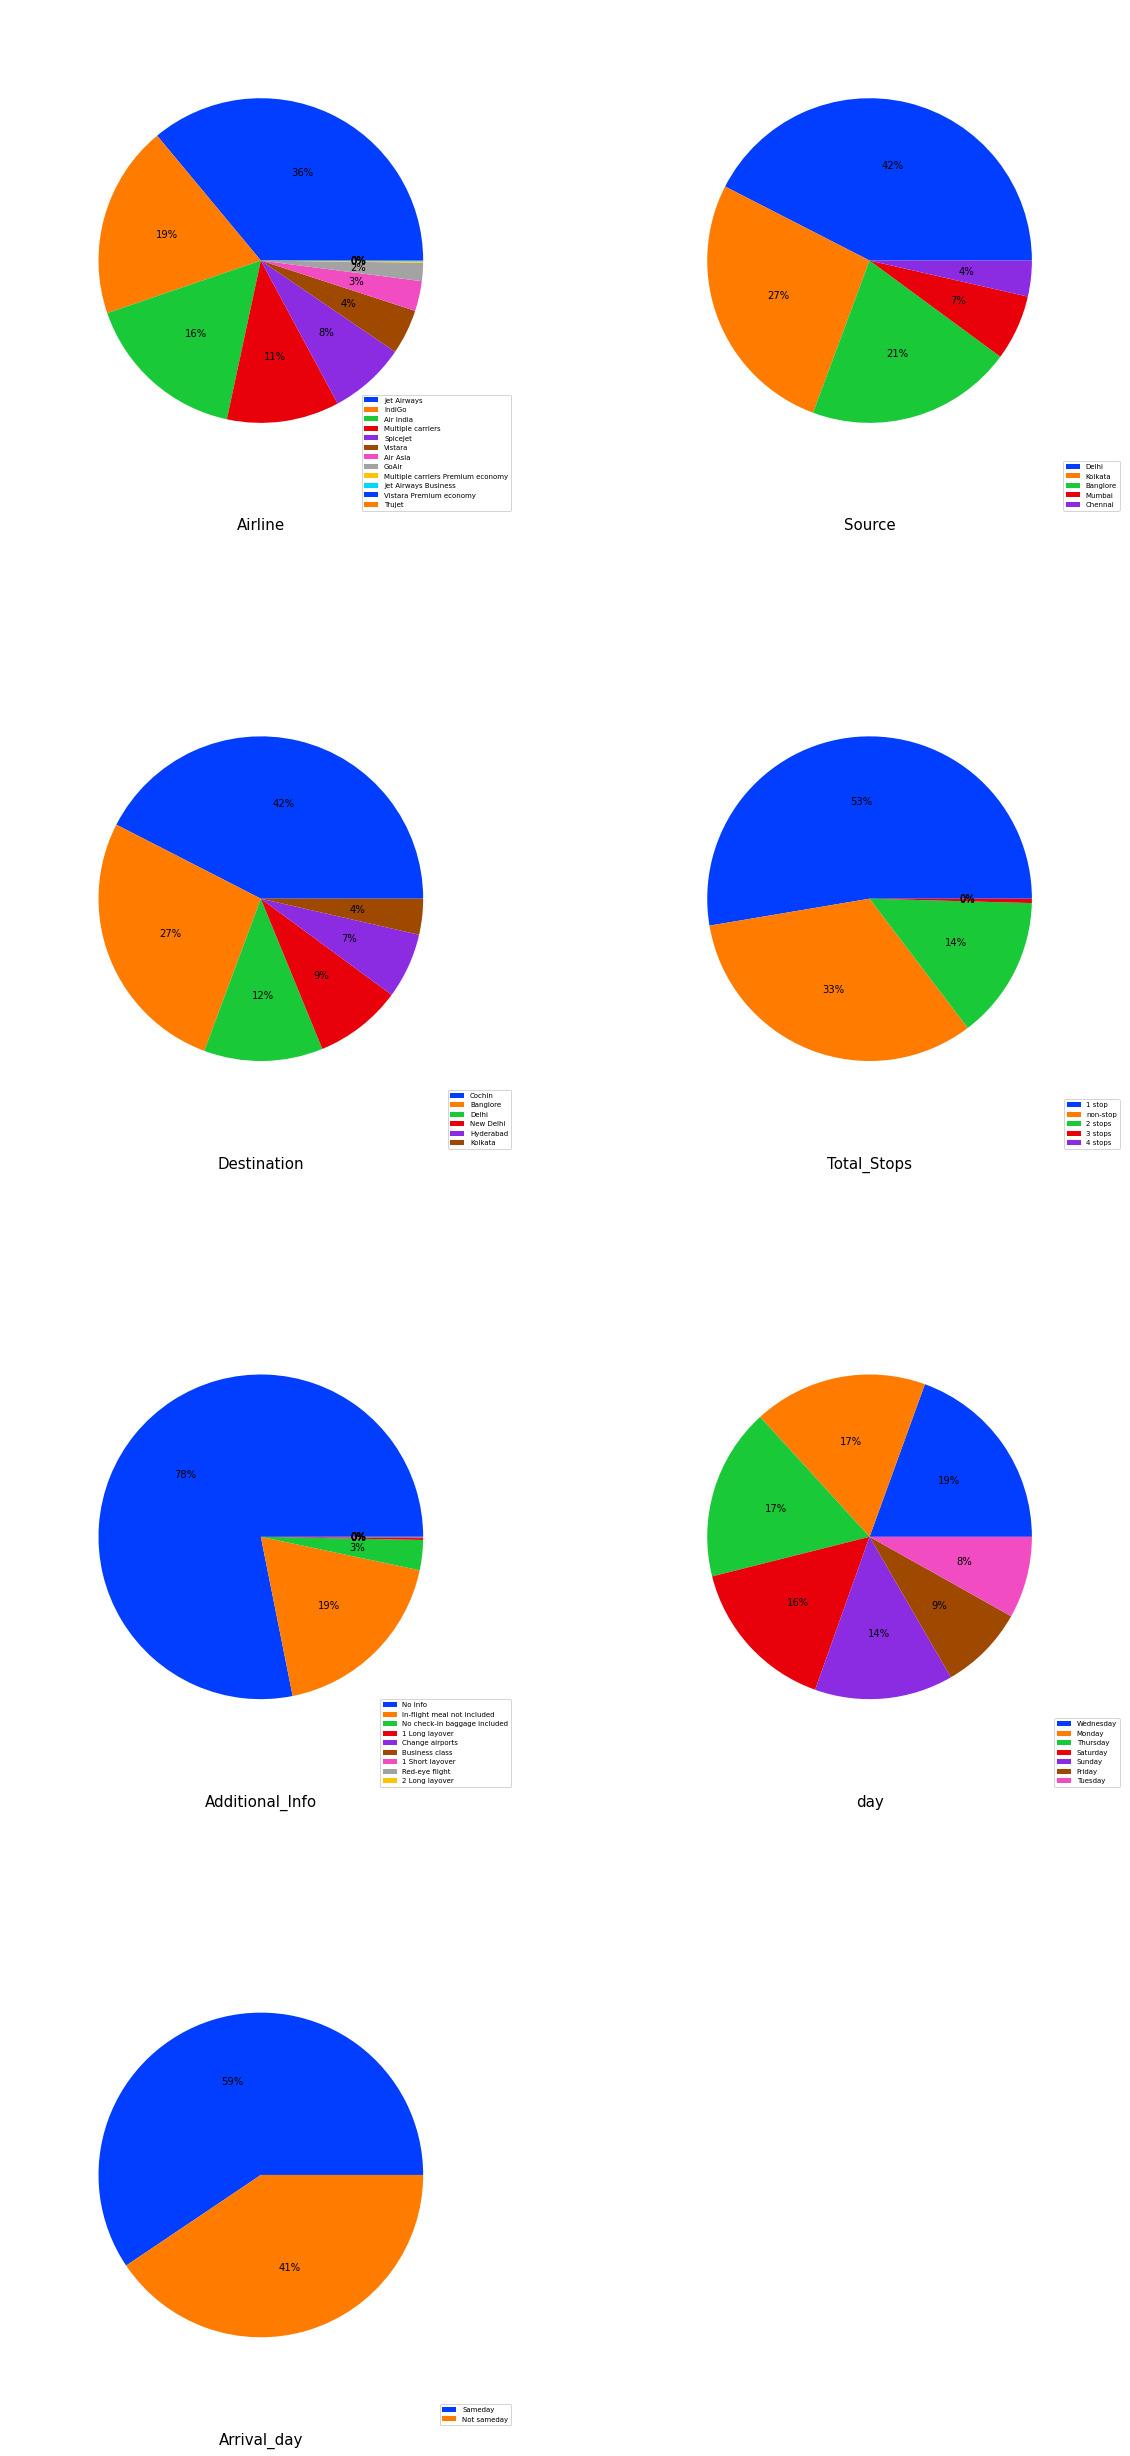

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize=(20,45))
sns.set_palette('bright')
graph=1
obj1=['Airline','Source','Destination','Total_Stops','Additional_Info','day','Arrival_day']
for column in obj1:
    if graph<=7:
        ax=plt.subplot(4,2,graph)
        plt.pie(x=df[column].value_counts(),autopct='%0.00f%%',radius=0.8)
        plt.legend(df[column].value_counts().index,loc=4,fontsize=7)
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()
plt.tight_layout()

* Above plots exhibits Percentage of categories within feature.

* Analysis of features with GroupBY method

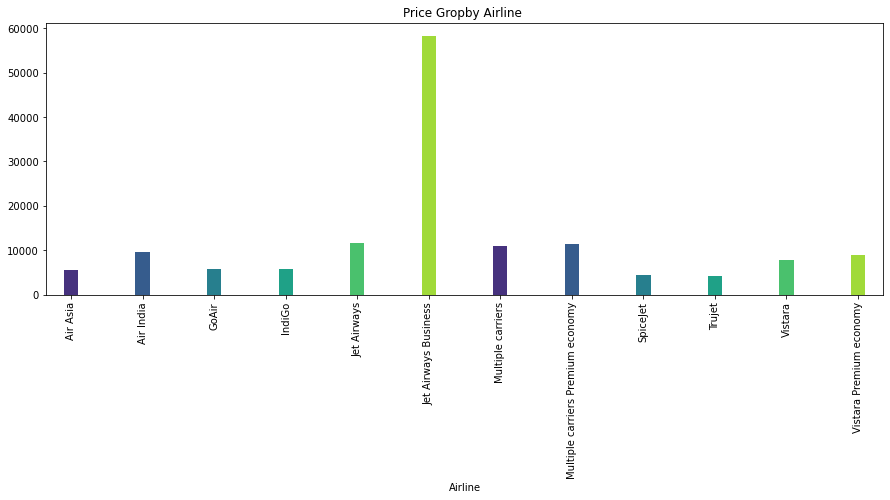

In [41]:
plt.figure(figsize=(15,5))
df.groupby('Airline')['Price'].mean().plot.bar(color=sns.color_palette('viridis'),width=0.2)
plt.title('Price Gropby Airline ')
plt.show()

1] Jet AirWays Bussines have highest mean  price 

2] Multiple carriers and Multiple carriers premium  economy has mean price of upto 10k

3] Spicejet has lowest mean Price.

* Price Gropby Source

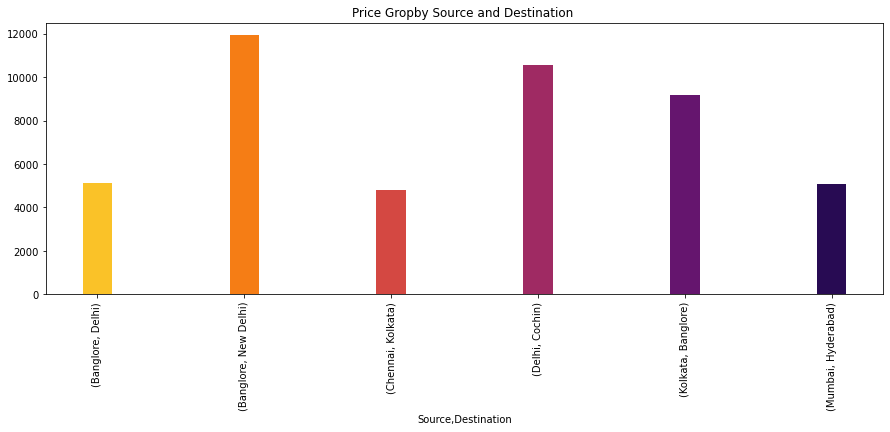

In [42]:
plt.figure(figsize=(15,5))
df.groupby(['Source','Destination'])['Price'].mean().plot.bar(color=sns.color_palette('inferno_r'),width=0.2)
plt.title('Price Gropby Source and Destination ')
plt.show()

1] Mean price of Bangalore to New Delhi flight Tickets  is highest upto 12k

2] mean Price for Chennai to Kolkata flight Tickets is lowest upto 5k


* 'Price Gropby Additional_Info

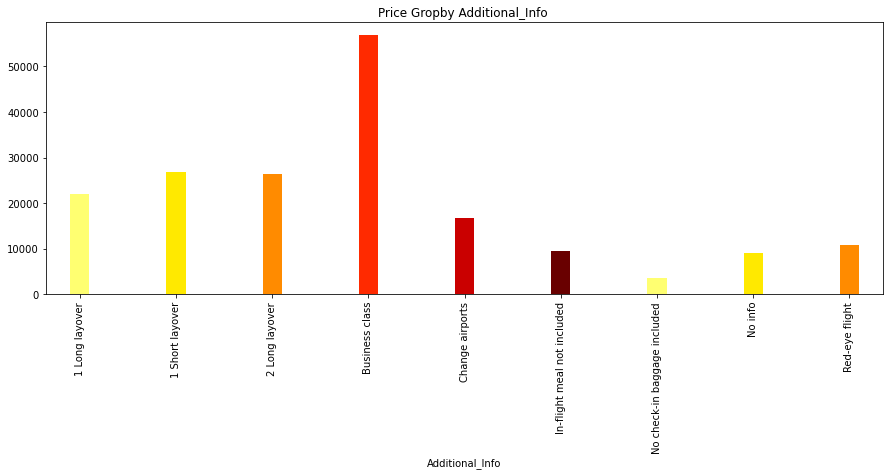

In [43]:
plt.figure(figsize=(15,5))
df.groupby('Additional_Info')['Price'].mean().plot.bar(color=sns.color_palette('hot_r'),width=0.2)
plt.title('Price Gropby Additional_Info ')
plt.show()

1] Bussiness class have high mean price of Tickets more tha 5k

2] others have nearly mean price.

* Prices groupby Arrival_day

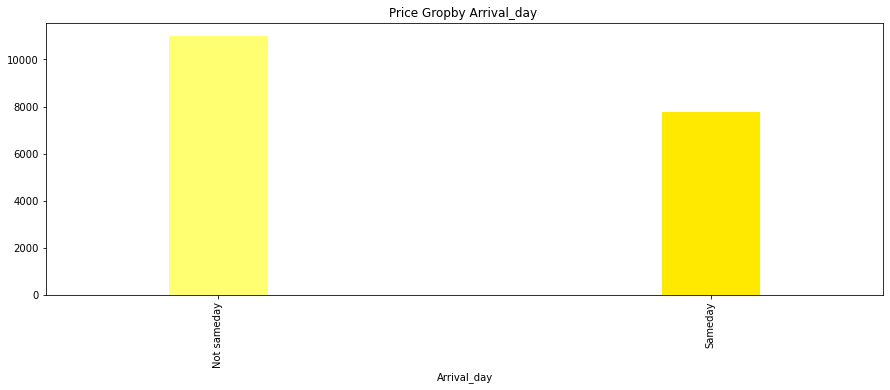

In [44]:
plt.figure(figsize=(15,5))
df.groupby('Arrival_day')['Price'].mean().plot.bar(color=sns.color_palette('hot_r'),width=0.2)
plt.title('Price Gropby Arrival_day ')
plt.show()

1] The mean ticket Prices of flights which arrived on next day are high .

* Seprating variables as Continuous and categorical on basis of categories in feature as WindDir feature has highest number of categories 16 which can be used for dividing features into categorical and continuous.

In [45]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'date', 'Quarter', 'Month', 'day', 'week',
       'Dep_hour', 'Dep_min', 'Arrival_Hour', 'Arrival_min', 'Arrival_day'],
      dtype='object')

* As Maximum categories 16 are in WindDir3pm features so it can be used for dividing dataset into continuous and categorial features.
 
 1] If more than 16 categories in variable it will be continuous in this dataset
    
 2] Else less than 16 categories in variable then it is categorical variable.   

In [46]:
for i in df.columns:
    print(i,":\n")
    print(len(df[i].unique()))
    print('______________________________\n')

Airline :

12
______________________________

Source :

5
______________________________

Destination :

6
______________________________

Route :

128
______________________________

Duration :

368
______________________________

Total_Stops :

5
______________________________

Additional_Info :

9
______________________________

Price :

1870
______________________________

date :

10
______________________________

Quarter :

2
______________________________

Month :

4
______________________________

day :

7
______________________________

week :

18
______________________________

Dep_hour :

24
______________________________

Dep_min :

12
______________________________

Arrival_Hour :

24
______________________________

Arrival_min :

12
______________________________

Arrival_day :

2
______________________________



* Sepration of continuous and Categorical freatures.

In [47]:
cont=[]
cat=[]
for i in df.columns:
    if len(df[i].unique())>129:
        cont.append(i)
        
    else:
        cat.append(i)
        
print(len(cont))
print(cont)
print('-'*30)
print(len(cat))
print(cat)

2
['Duration', 'Price']
------------------------------
16
['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info', 'date', 'Quarter', 'Month', 'day', 'week', 'Dep_hour', 'Dep_min', 'Arrival_Hour', 'Arrival_min', 'Arrival_day']


* Bivariate Analysis of Features with Rainfall as target

1] scatterplot with Duration features.

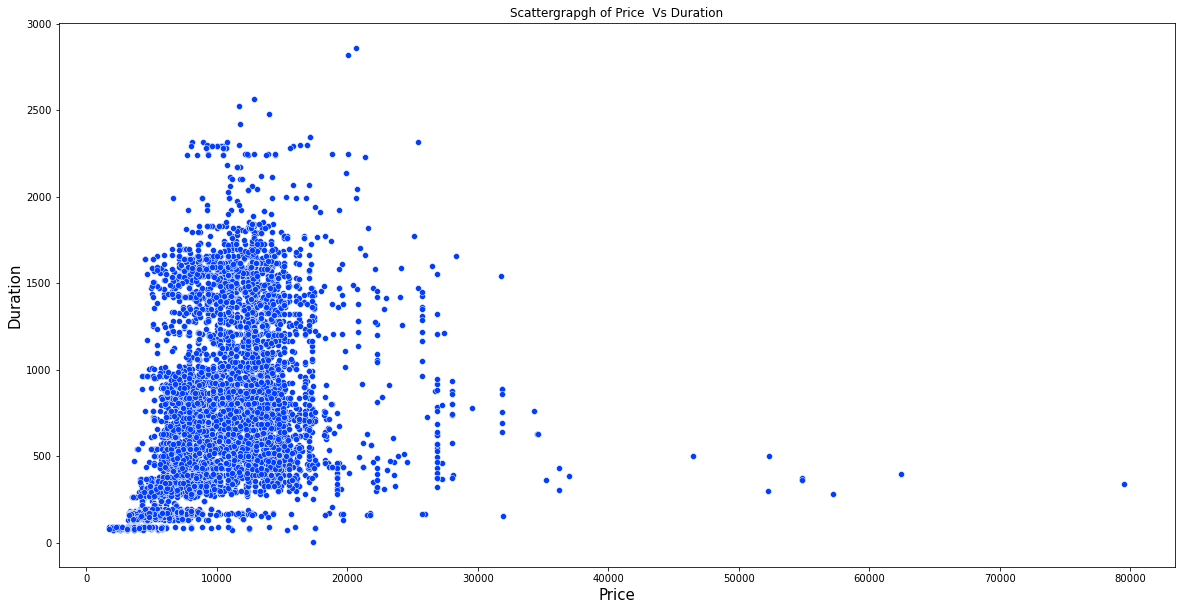

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=df['Duration'],x=df['Price'])
plt.xlabel('Price',fontsize=15)
plt.ylabel('Duration',fontsize=15)
plt.title('Scattergrapgh of Price  Vs Duration')
plt.show()
plt.tight_layout()

* There is no tren or relation ship can be observe in duration and Price of flight.

2] categorical features with Price

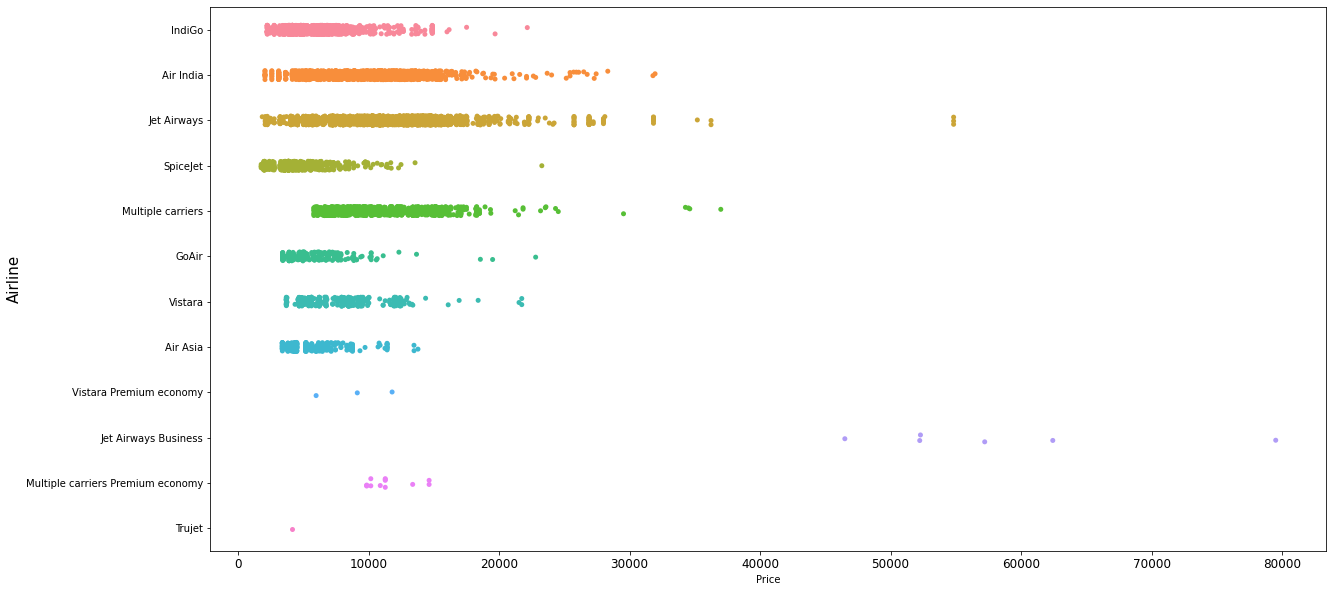

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize=(20,10))
sns.set_palette('cubehelix_r')
sns.stripplot(y=df['Airline'],x=df['Price'])
plt.ylabel('Airline',fontsize=15)
plt.xticks(fontsize=12)  
plt.show()
plt.tight_layout()

1] Jet Airways Bussiness have highest prices of tickets.Most of Outliers are belongs to this Airline.

2] Trujet has only one datapoint.

* ViolinPlot with Airline Categories

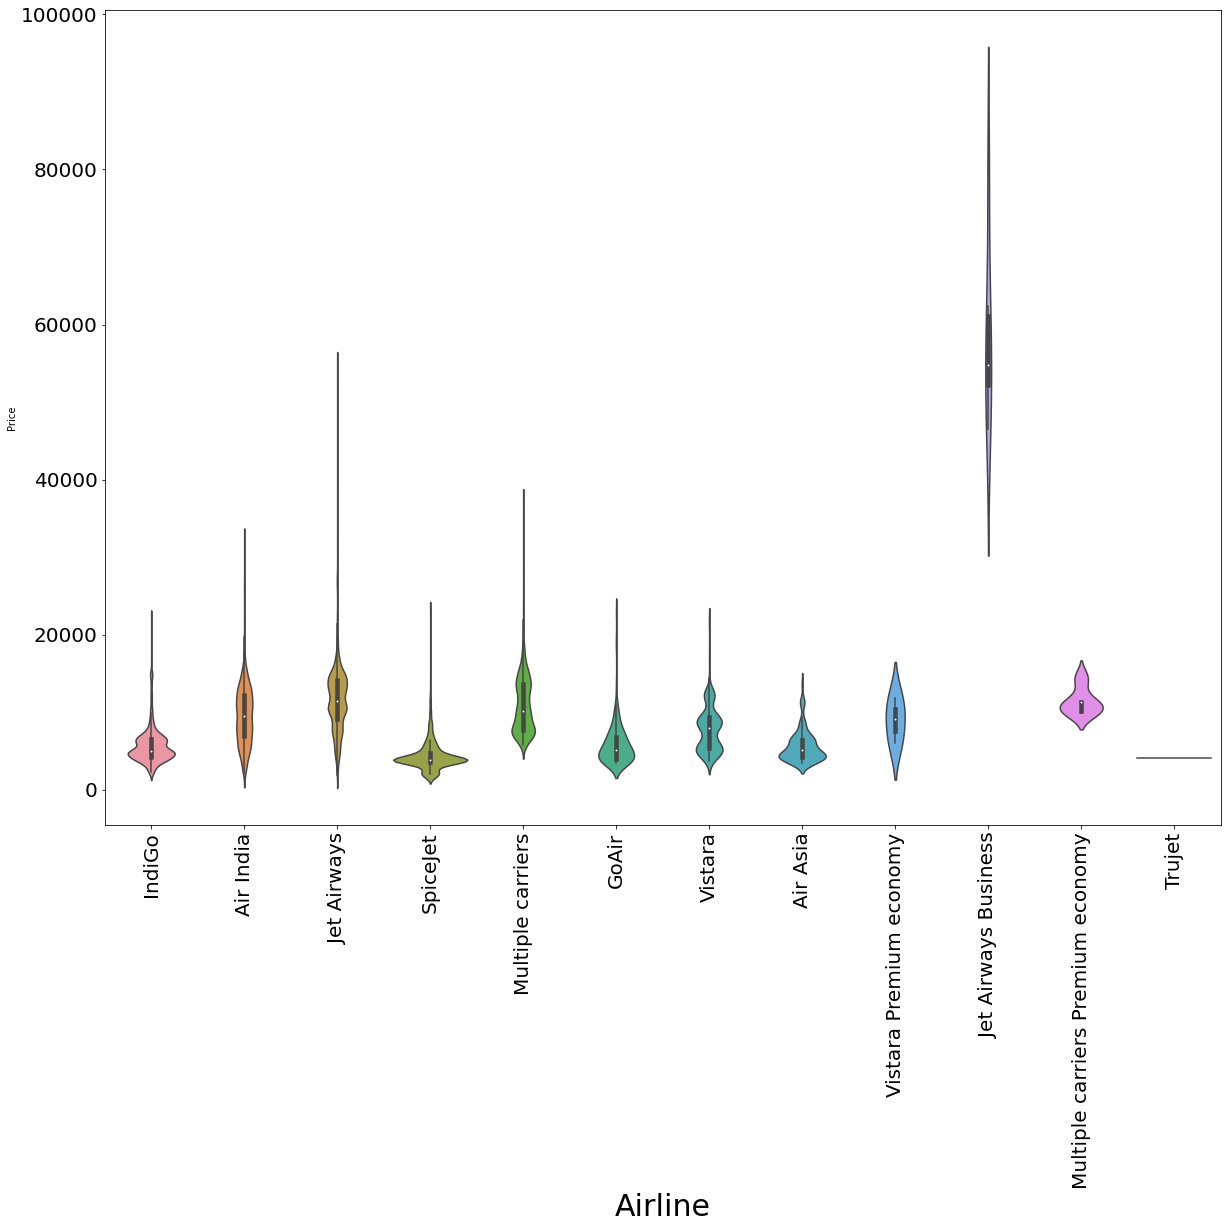

<Figure size 432x288 with 0 Axes>

In [50]:
plt.figure(figsize=(20,15))
sns.set_palette('magma_r')
sns.violinplot(x=df['Airline'],y=df['Price'])
plt.xlabel('Airline',fontsize=30)
plt.xticks(fontsize=20,rotation='90')
plt.yticks(fontsize=20)
plt.show()
plt.tight_layout()

1] The distribution of price with Airline companies.

2] jet Airways and jet Airways Bussiness have high amoint of outliers with respect to median of fares respective categories

3] Vistara premium economy and Multiple carriers preium economyhave very less values so there no outliers are observed

* Source with Response Price

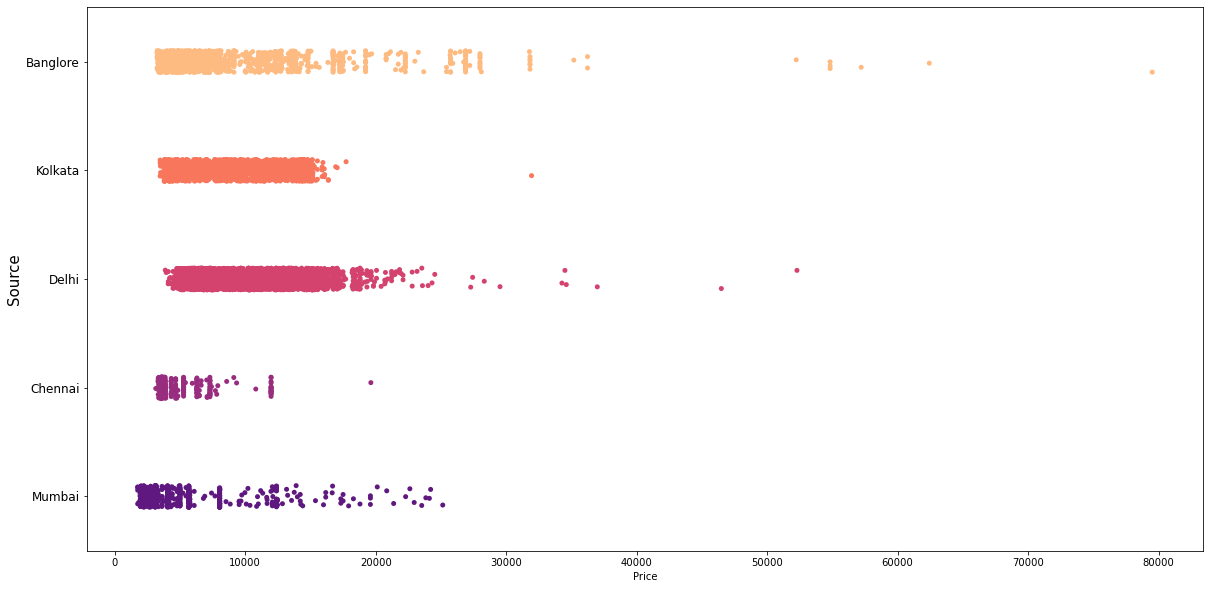

<Figure size 432x288 with 0 Axes>

In [51]:
plt.figure(figsize=(20,10))
sns.set_palette('magma_r')
sns.stripplot(y=df['Source'],x=df['Price'])
plt.ylabel('Source',fontsize=15)
plt.yticks(fontsize=12)  
plt.show()
plt.tight_layout()

1] High prices are observe from Banglore source. and also large nmber of flights belongs to Banglore as Departure.

2] less flight from Chennai as Departure.

* ViolinPlot with Source Categories

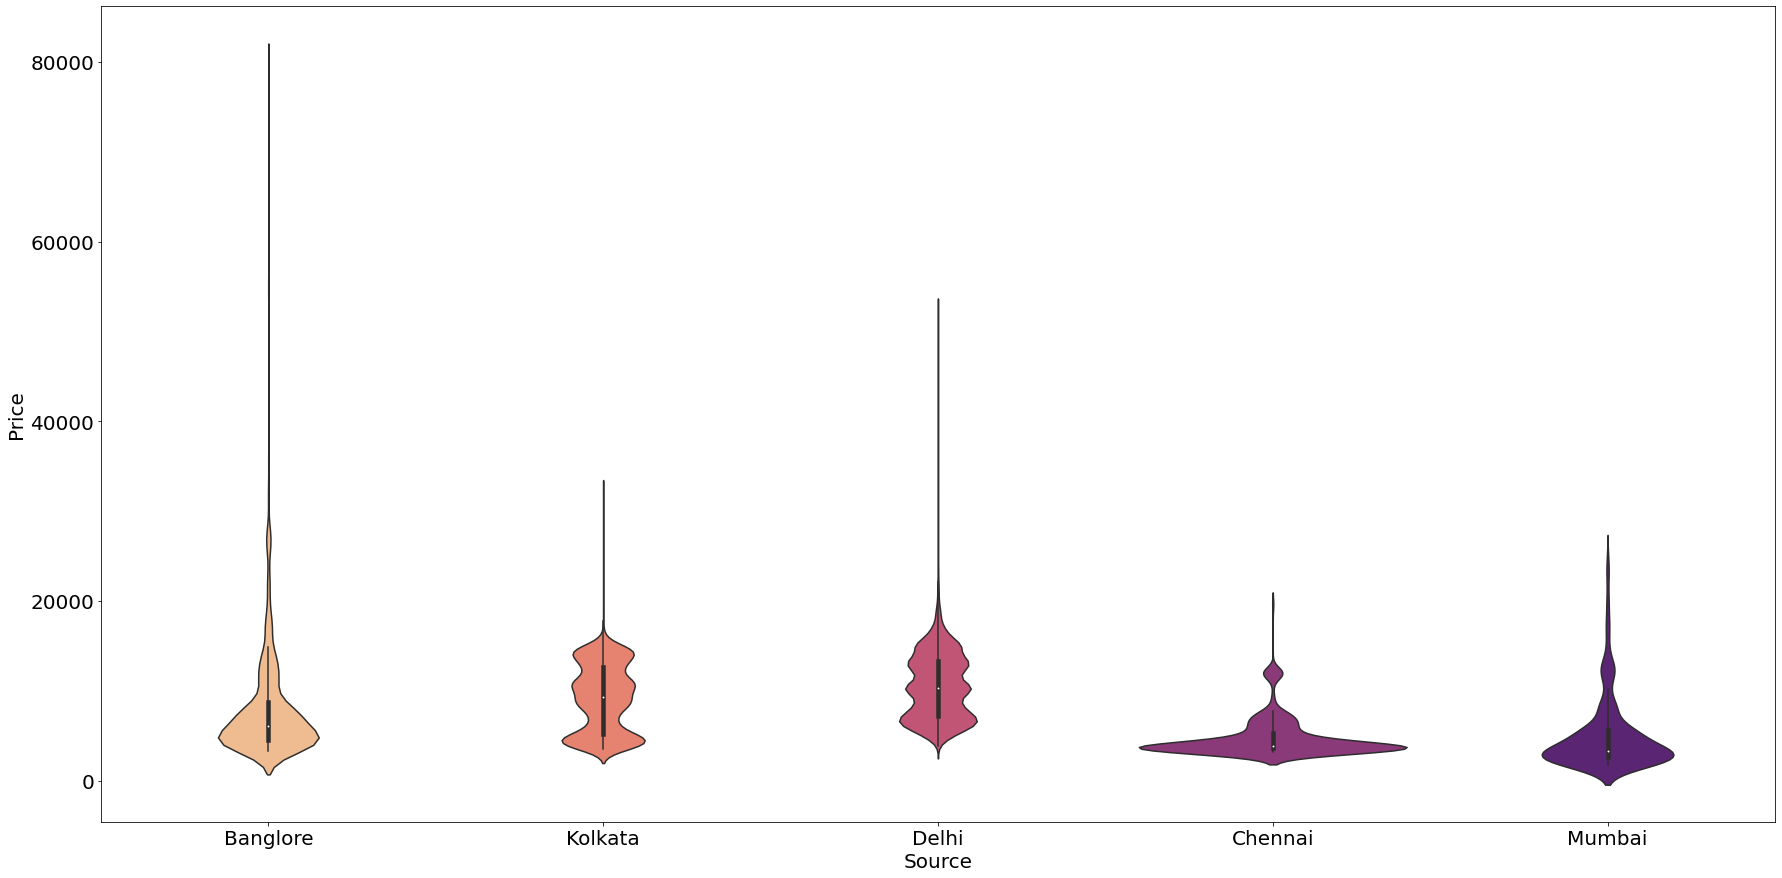

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(figsize=(30,15))
sns.set_palette('magma_r')
sns.violinplot(x=df['Source'],y=df['Price'])
plt.xlabel('Source',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
plt.tight_layout()

1] high amount outliers in Price are belongs to Bangalore as Source .

2] Chennai has very less data points , which very low deviation from mean 

* Categorical plot with Destination with Price.

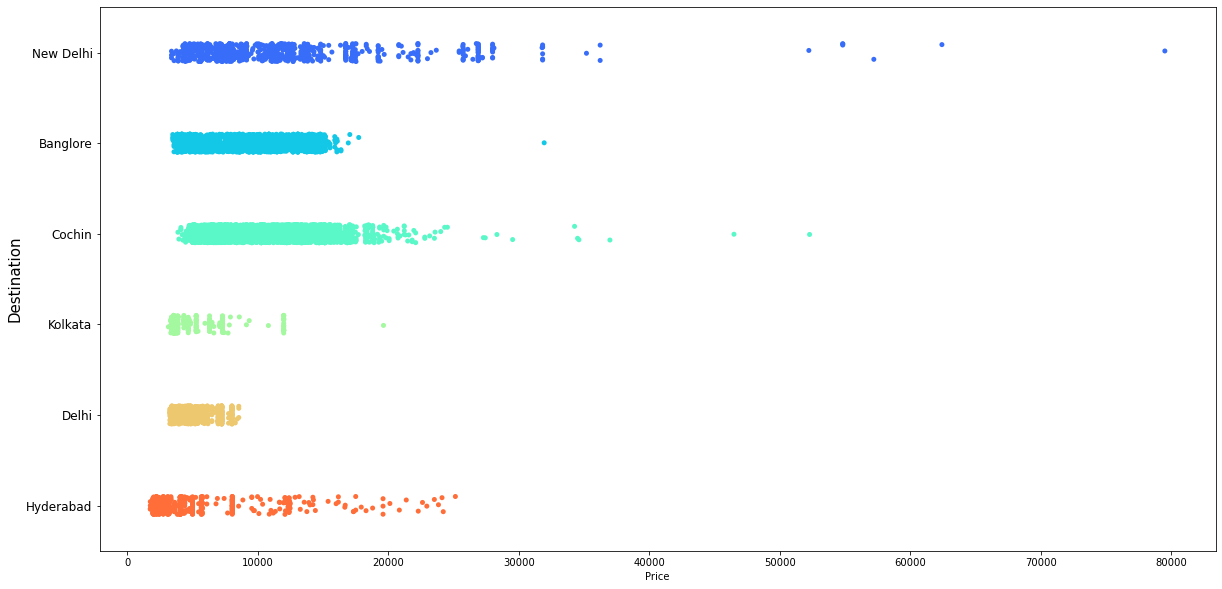

<Figure size 432x288 with 0 Axes>

In [53]:
plt.figure(figsize=(20,10))
sns.set_palette('rainbow')
sns.stripplot(y=df['Destination'],x=df['Price'])
plt.ylabel('Destination',fontsize=15)
plt.yticks(fontsize=12)  
plt.show()
plt.tight_layout()

1] High fares are belongs to flight having New Delhi as Destination.

2] same behavior is exhibited by Cochin lightly lower graph.

* Violin plot of Destination category with Price 

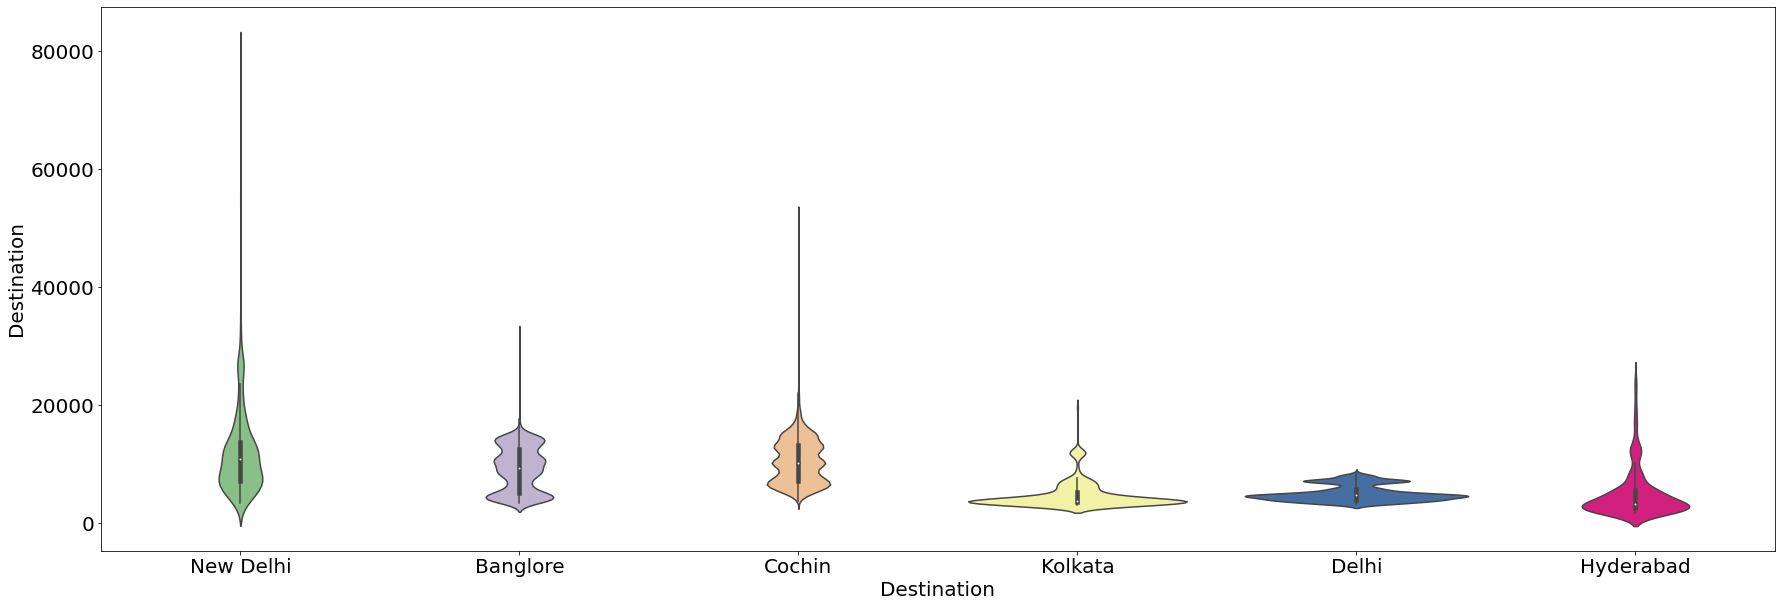

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize=(30,10))
sns.set_palette('Accent')
sns.violinplot(x=df['Destination'],y=df['Price'])
plt.xlabel('Destination',fontsize=20)
plt.ylabel('Destination',fontsize=20)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)  
plt.show()
plt.tight_layout()

1] The High amount of Outliers in fares  can be observed in  flights with  New Delhi as Destination

2] Kolkata and Delhi Destination have low amount of outliers and The distribution has lower deviation from mean.

* Route with Price.

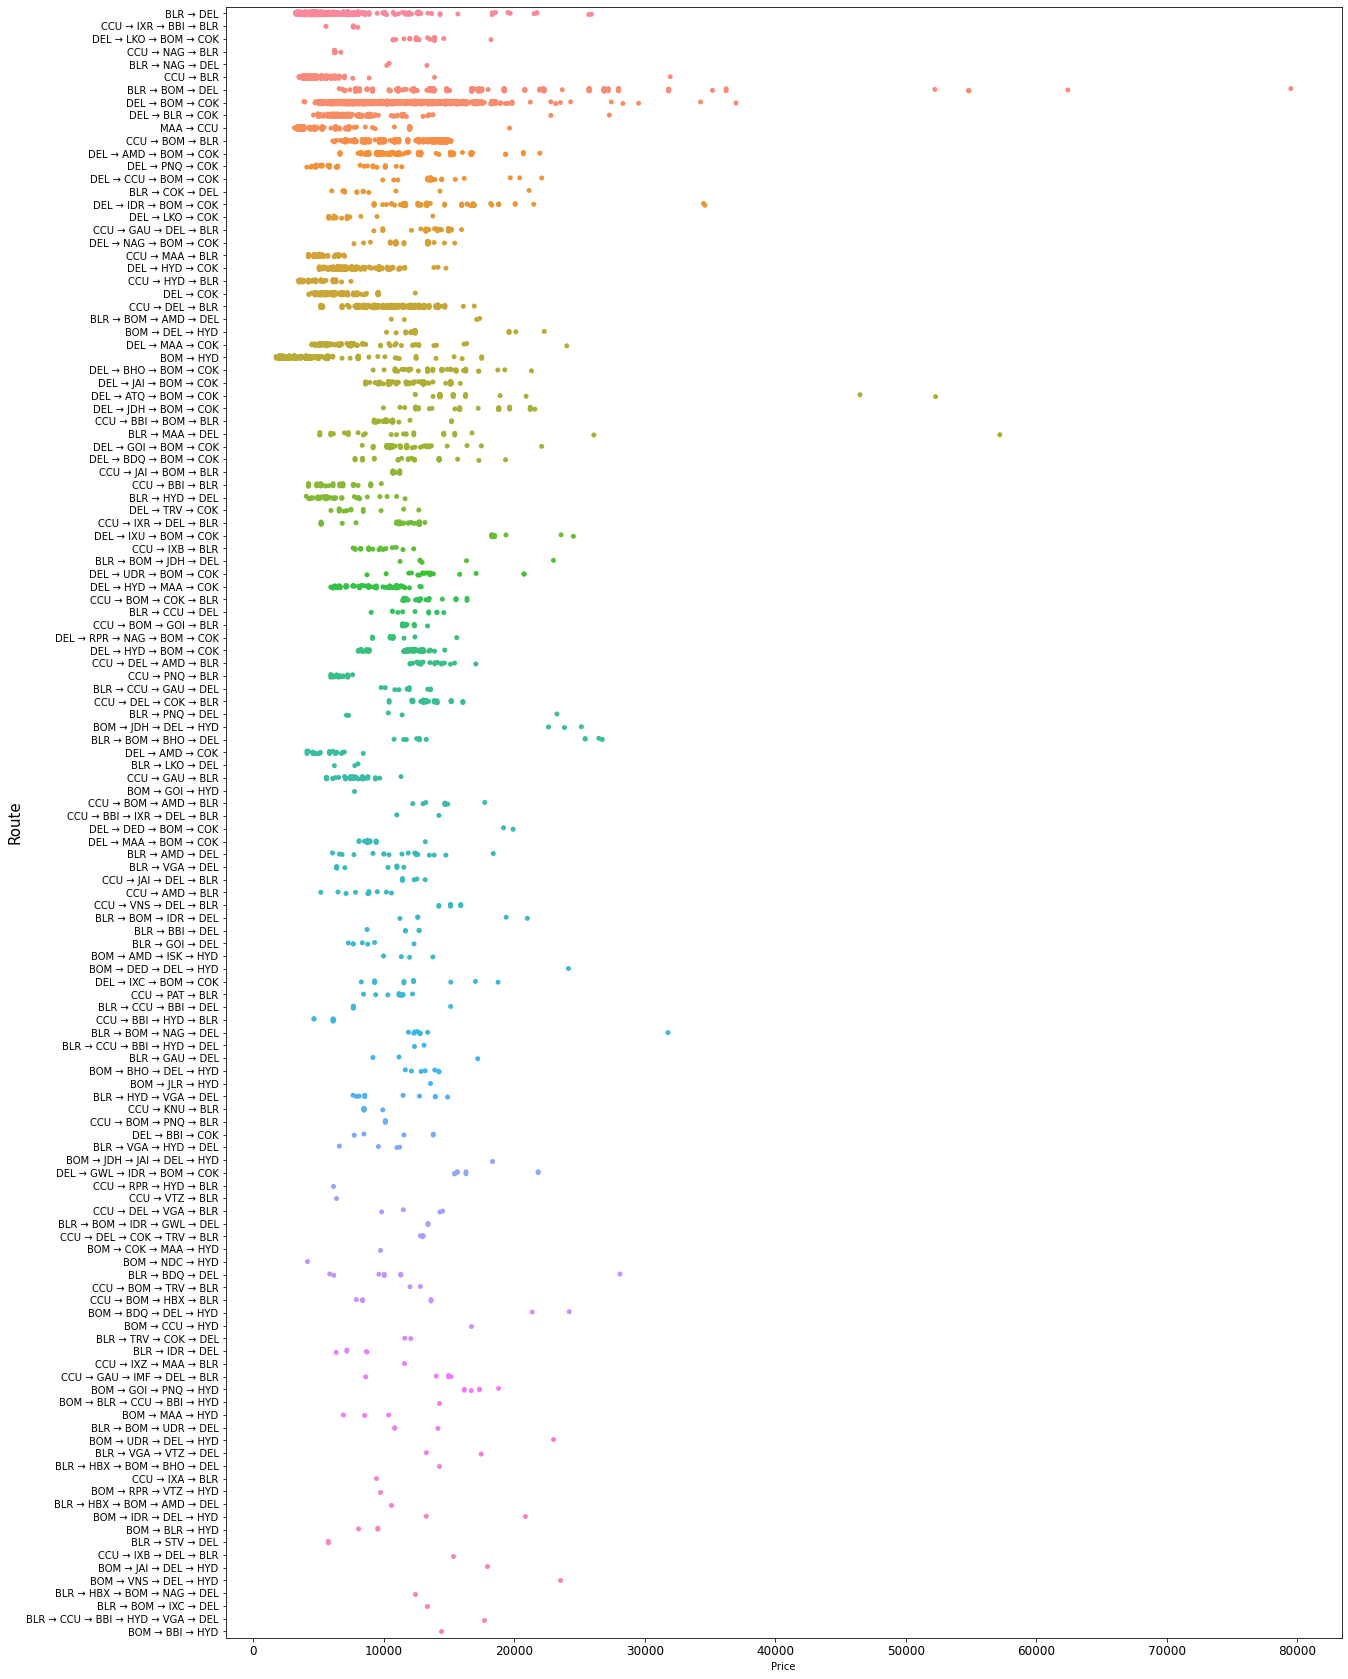

<Figure size 432x288 with 0 Axes>

In [55]:
plt.figure(figsize=(20,30))
sns.set_palette('cividis')
sns.stripplot(y=df['Route'],x=df['Price'])
plt.ylabel('Route',fontsize=15)
plt.xticks(fontsize=12)  
plt.show()
plt.tight_layout()

1] There is High variance exhibited by route of flights in  Price distribution

* Categorical plot of Total Stops with Price.

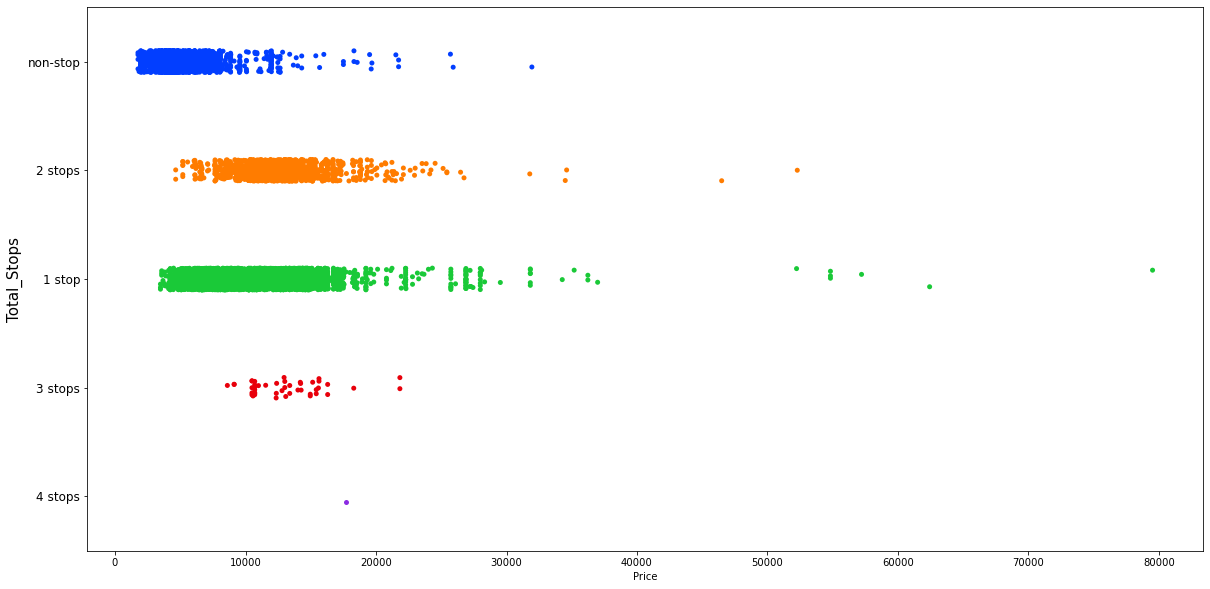

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize=(20,10))
sns.set_palette('bright')
sns.stripplot(y=df['Total_Stops'],x=df['Price'])
plt.ylabel('Total_Stops',fontsize=15)
plt.yticks(fontsize=12)  
plt.show()
plt.tight_layout()

1] One stop flights have high outliers ,also it has arge amount of data.

2] 4 stop flight is only one in dataset.

* Violin plot of Total_Stops with Price

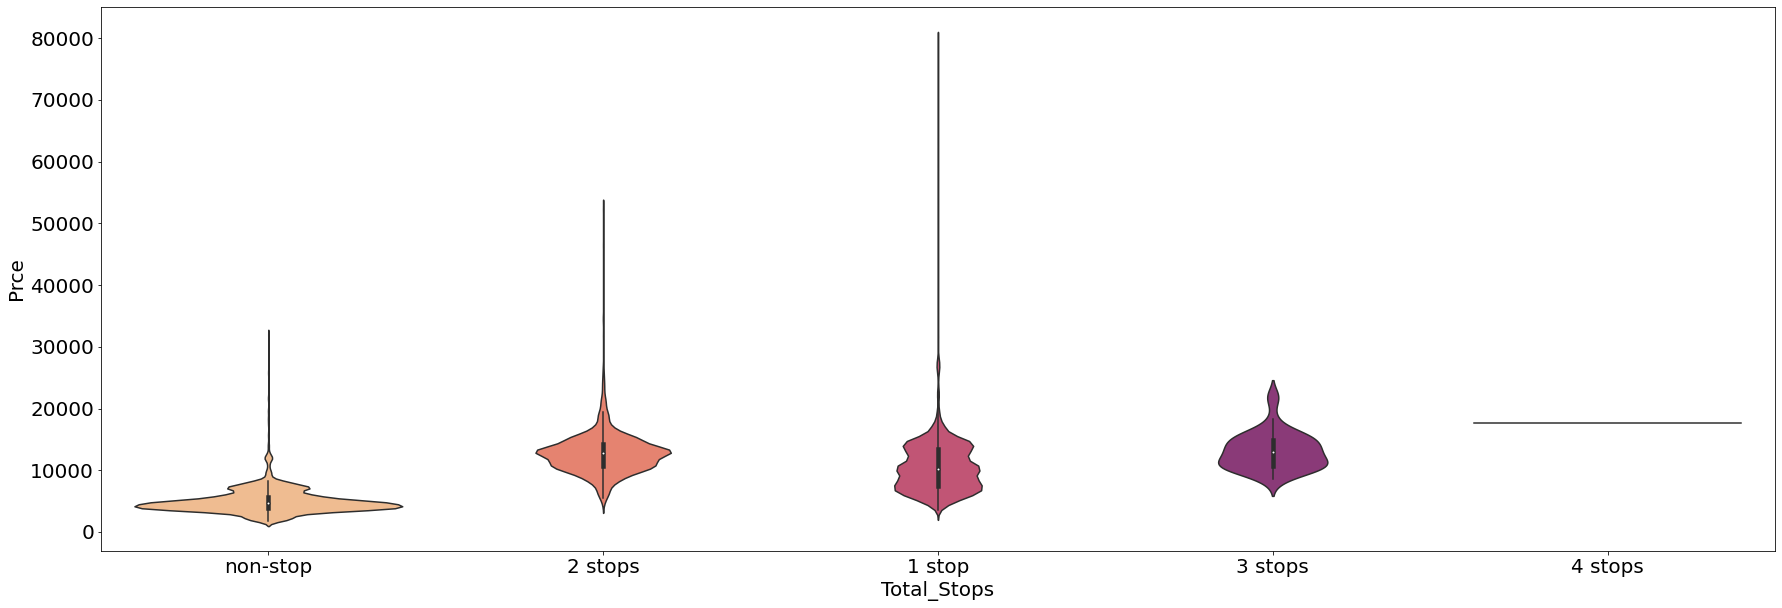

<Figure size 432x288 with 0 Axes>

In [57]:
plt.figure(figsize=(30,10))
sns.set_palette('magma_r')
sns.violinplot(x=df['Total_Stops'],y=df['Price'])
plt.xlabel('Total_Stops',fontsize=20)
plt.ylabel('Prce',fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)  
plt.show()
plt.tight_layout()

1]  High amount of Outliers are observed in 1 stop and 2 stop flight fares distribution the distribution s also skewed in nature.

2] Non Stop flights have less fares. and Distribution is also concentrated towards median.

* categorical plot of Additional Info with Price

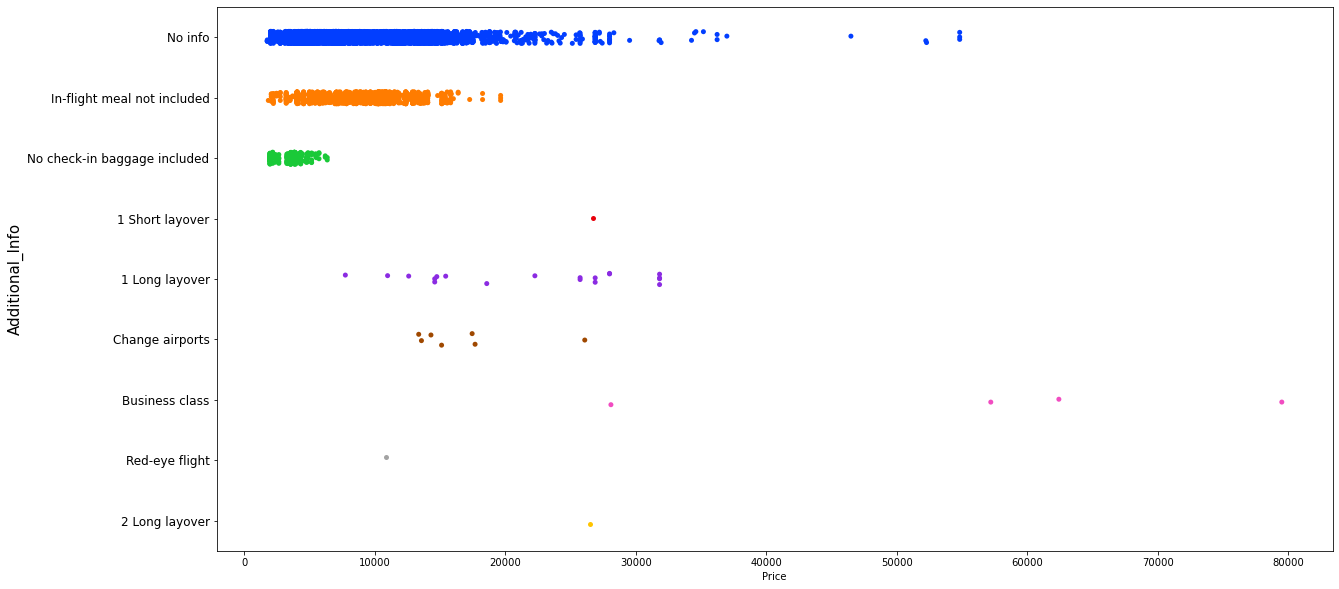

<Figure size 432x288 with 0 Axes>

In [58]:
plt.figure(figsize=(20,10))
sns.set_palette('bright')
sns.stripplot(y=df['Additional_Info'],x=df['Price'])
plt.ylabel('Additional_Info',fontsize=15)
plt.yticks(fontsize=12)  
plt.show()
plt.tight_layout()

1] No info has highest  number of datapoints.

2] 2 long layover has 1 datapoint and Red eye flighht has only oe datapoint

3] 1 short layover also has only datapoint.

* Categorical plot of date with Price

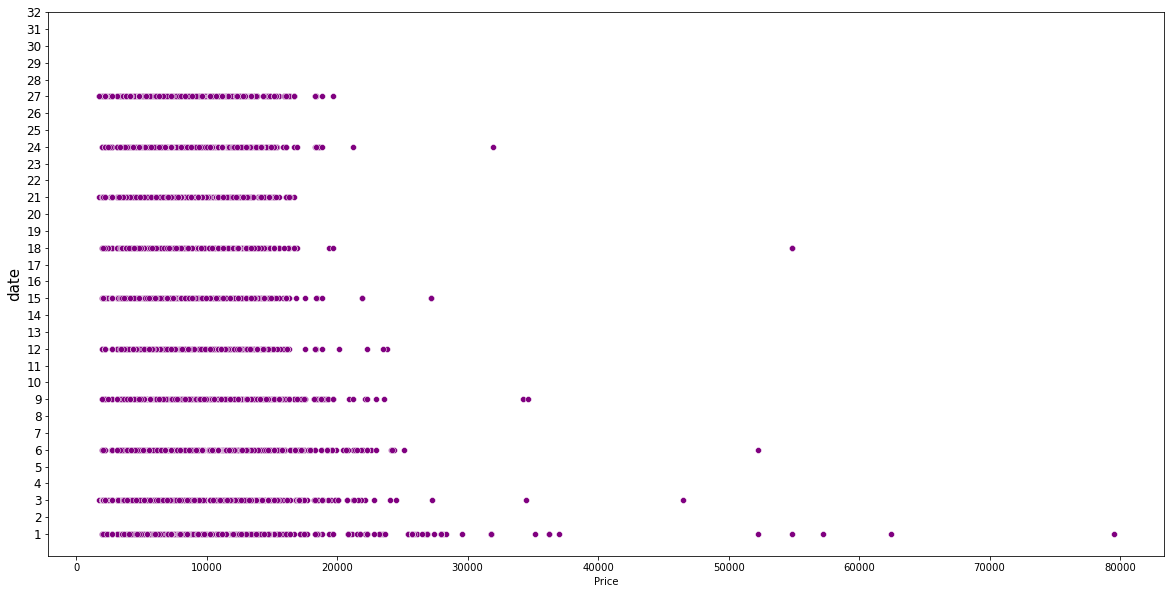

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=df['date'],x=df['Price'],color='purple')
plt.ylabel('date',fontsize=15)
plt.yticks(range(1,33),fontsize=12)  
plt.show()
plt.tight_layout()

1] It can be observe that there is variance in pries as date changes.

2] Thre are no flights on 28,29,30,31 date.

* CAtegorical plot of Quarte with Price.

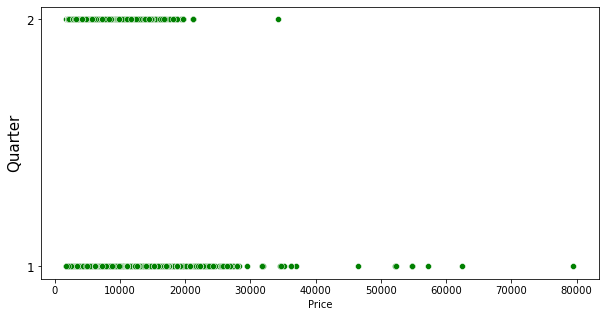

<Figure size 432x288 with 0 Axes>

In [60]:
plt.figure(figsize=(10,5))
sns.set_palette('plasma')
sns.scatterplot(y=df['Quarter'],x=df['Price'],color='g')
plt.ylabel('Quarter',fontsize=15)
plt.yticks([1,2],fontsize=12)  
plt.show()
plt.tight_layout()

1] Flights in march which comes under first quarter of year have high ticket prices.

* categorical plot of Month with price

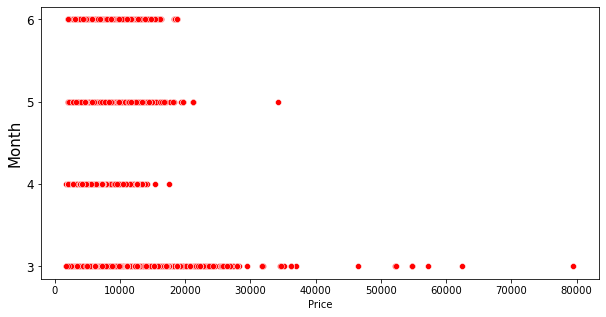

<Figure size 432x288 with 0 Axes>

In [61]:
plt.figure(figsize=(10,5))
sns.set_palette('plasma')
sns.scatterplot(y=df['Month'],x=df['Price'],color='r')
plt.ylabel('Month',fontsize=15)
plt.yticks(range(3,7),fontsize=12)  
plt.show()
plt.tight_layout()

1] There are high fares for flight in March .

2] There are less flights in April.

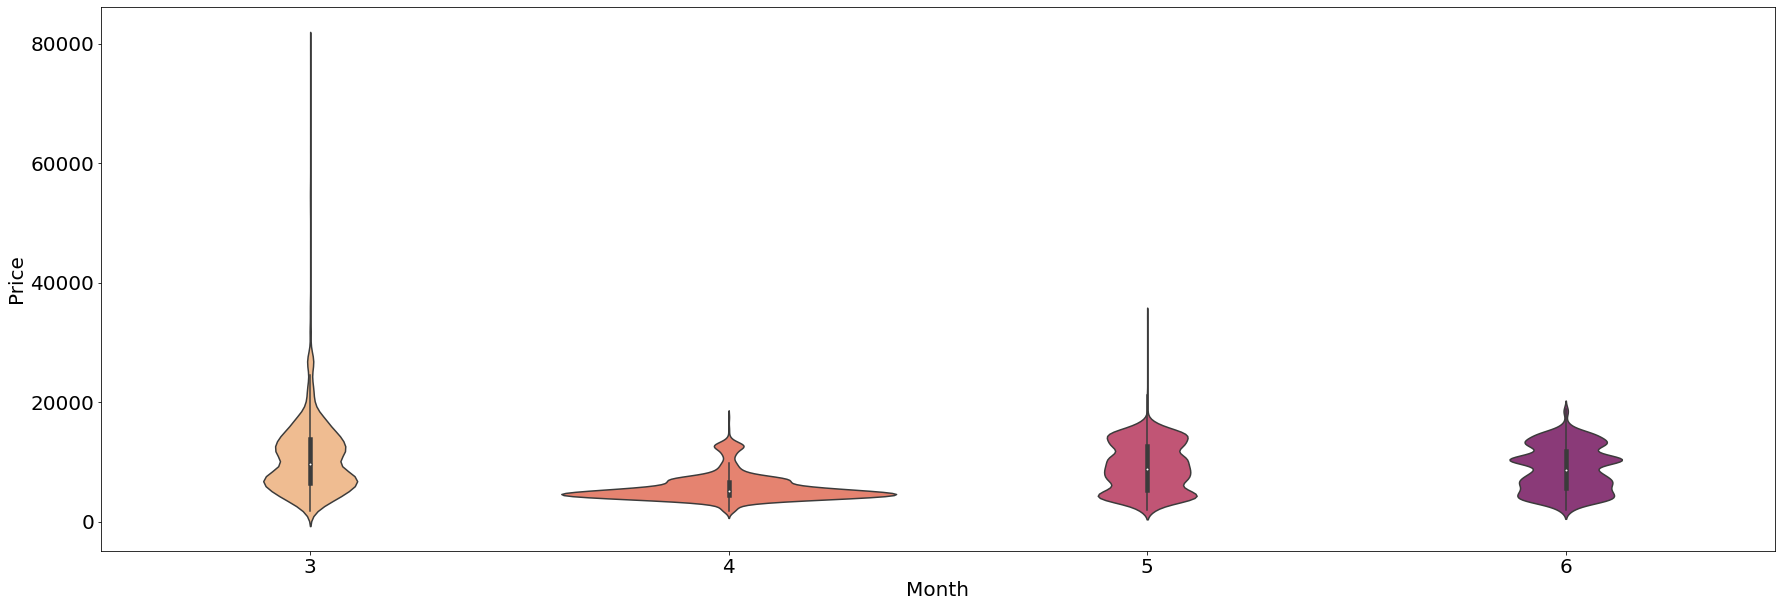

<Figure size 432x288 with 0 Axes>

In [62]:
plt.figure(figsize=(30,10))
sns.set_palette('magma_r')
sns.violinplot(x=df['Month'],y=df['Price'])
plt.xlabel('Month',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)  
plt.show()
plt.tight_layout()

1] High amount of outliers are observed in March and also right skewed distribution is exhibited with fares distribution.

2] Flights in April have less fares with les skewed distribution having fares with low deviation from median.

* Categorical plot of day with Price.

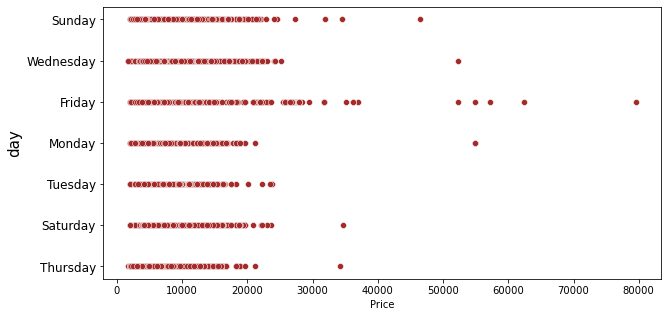

<Figure size 432x288 with 0 Axes>

In [63]:
plt.figure(figsize=(10,5))
sns.set_palette('plasma')
sns.scatterplot(y=df['day'],x=df['Price'],color='brown')
plt.ylabel('day',fontsize=15)
plt.yticks(fontsize=12)  
plt.show()
plt.tight_layout()

1] High fare flights are on friday, sunday and wednsday of week.

* Categorical plot of week with Price

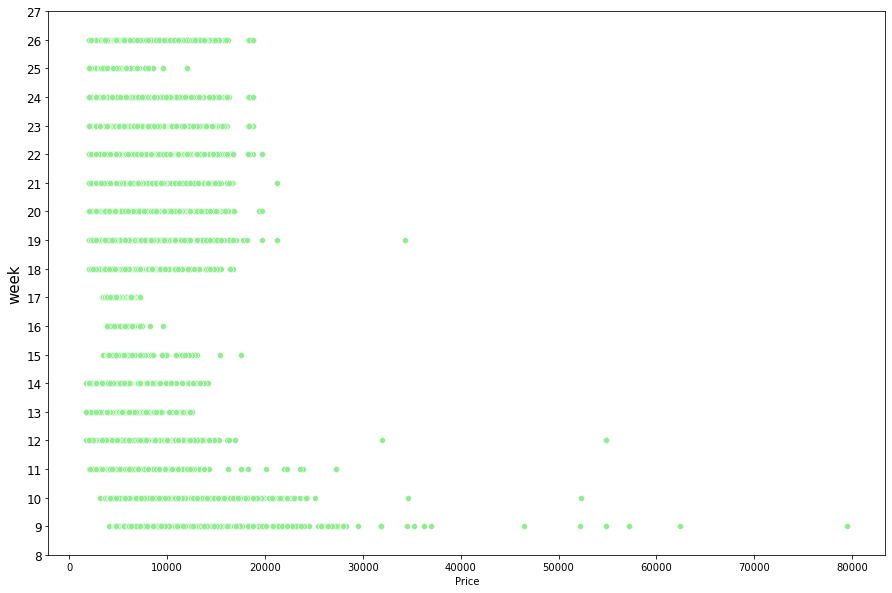

<Figure size 432x288 with 0 Axes>

In [64]:
plt.figure(figsize=(15,10))
sns.set_palette('plasma')
sns.scatterplot(y=df['week'],x=df['Price'],color='lightgreen')
plt.ylabel('week',fontsize=15)
plt.yticks(range(8,28),fontsize=12)  
plt.show()
plt.tight_layout()

1] There is variance in prices can found in weeek wise distribution of flights.

* Categorical plot of Arrival_day with Price

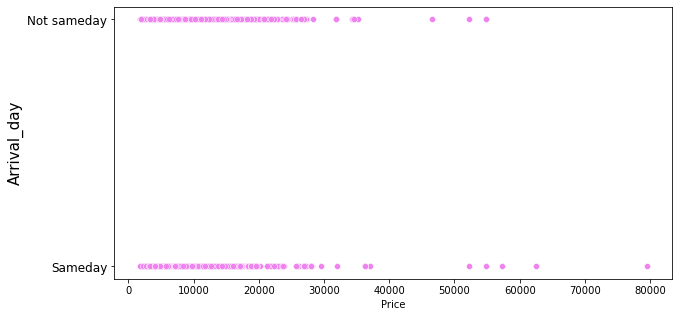

<Figure size 432x288 with 0 Axes>

In [65]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=df['Arrival_day'],x=df['Price'],color='violet')
plt.ylabel('Arrival_day',fontsize=15)
plt.yticks(fontsize=12)  
plt.show()
plt.tight_layout()

1] There is significant variance can be observe.

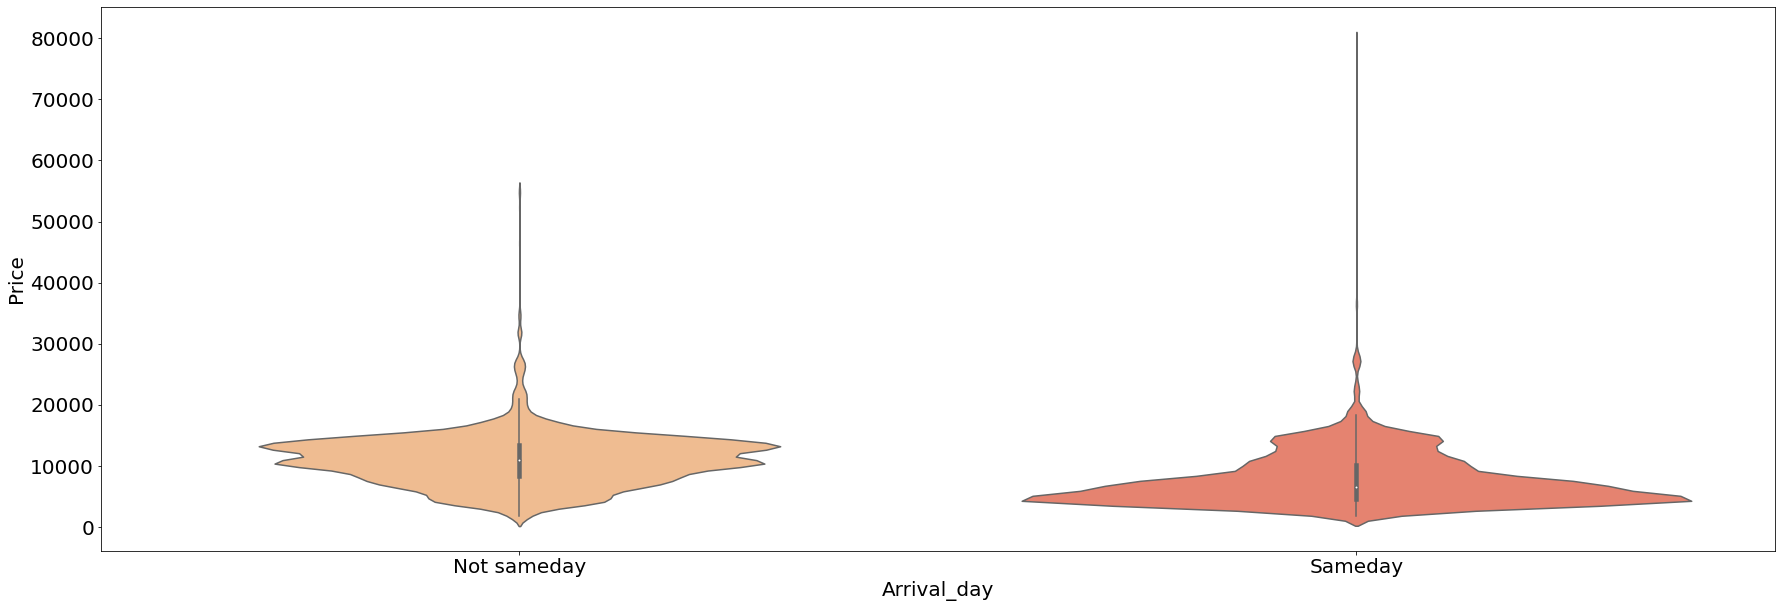

<Figure size 432x288 with 0 Axes>

In [66]:
plt.figure(figsize=(30,10))
sns.set_palette('magma_r')
sns.violinplot(x=df['Arrival_day'],y=df['Price'])
plt.xlabel('Arrival_day',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)  
plt.show()
plt.tight_layout()

1] The outliers in fare are belongs to flights which arrived on same day.


* Unique values in features before Encoding with LabelEncoder

In [67]:
for i in obj:
    print(i,":\n")
    print(df[i].unique())
    print('______________________________\n')

Airline :

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
______________________________

Source :

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
______________________________

Destination :

['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
______________________________

Route :

['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → CO

* Encoding variables

In [68]:
obj

['Airline',
 'Source',
 'Destination',
 'Route',
 'Total_Stops',
 'Additional_Info',
 'day',
 'Arrival_day']

In [69]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()
le8=LabelEncoder()

le_list=[le1,le2,le3,le4,le5,le6,le7,le8]

In [70]:
for i,j in zip(obj,le_list):
    df[i]=j.fit_transform(df[i])

* Unique values in features after Encoding with LabelEncoder

In [71]:
for i in obj:
    print(i,":\n")
    print(df[i].unique())
    print('______________________________\n')

Airline :

[ 3  1  4  8  6  2 10  0 11  5  7  9]
______________________________

Source :

[0 3 2 1 4]
______________________________

Destination :

[5 0 1 4 2 3]
______________________________

Route :

[ 18  84 118  91  29  64   5 104 103 127  66  97 123 105  17 113 119  78
 122  90 111  80 106  73   3  45 121  48 102 116  99 117  61  28 108 101
  87  60  24 125  85 115  82   9 126 112  67  15  68 124 110  72  93  16
  74  30  51   4  98  27  77  46  65  63 107 120   0  33  88  59  95   6
   1  20  36  44 114  92  12  62  10  13  19  39  53  25  89  70 100  34
  52 109  94  96  76   7  75  43  55   2  71  69  38  42  32  26  86  79
  47  40  54  11  57  35  22  81  56  21  49  41  31  83  50  58  23   8
  14  37]
______________________________

Total_Stops :

[4 1 0 2 3]
______________________________

Additional_Info :

[7 5 6 1 0 4 3 8 2]
______________________________

day :

[3 6 0 1 5 2 4]
______________________________

Arrival_day :

[0 1]
______________________________



* Analysis of Distribution and Outliers in continuous variables .

1] There are two continuous variables Duration and Price 

2] There will be only analysis on Duration feature as Price is targte feature.

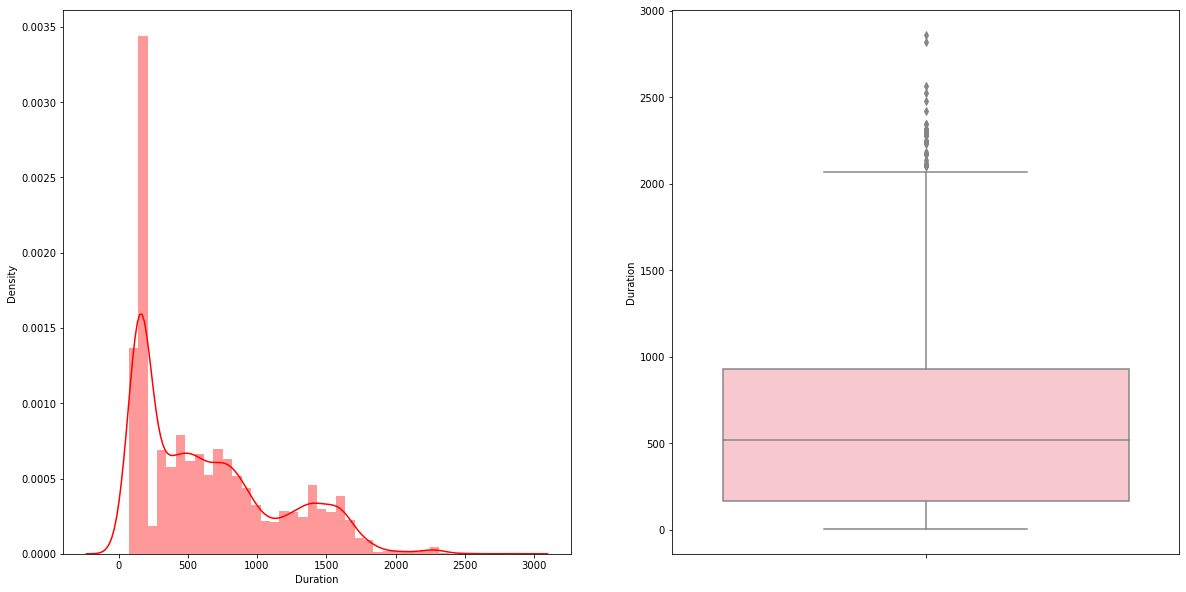

In [72]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df["Duration"],color='red',kde=True,ax=fig.add_subplot(1,2,1))
sns.boxplot(y=df['Duration'],color='pink',ax=fig.add_subplot(1,2,2))
plt.show()

1] Duration feature is right skewed in nature.

2] There are outliers are detected in Boxplot of Duration feature.

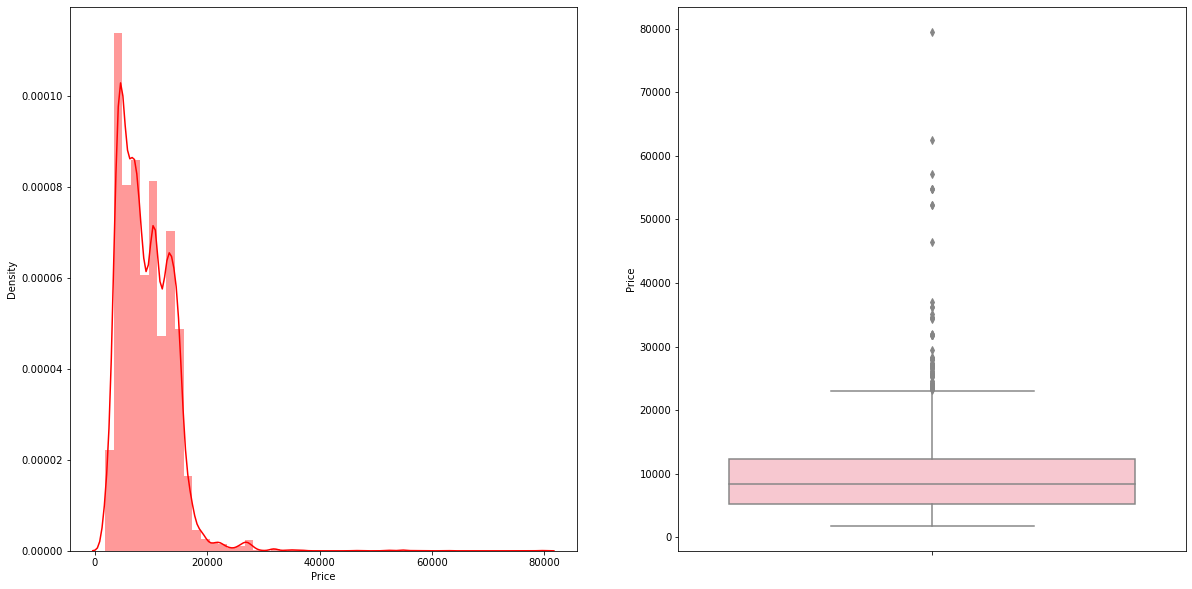

In [73]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df["Price"],color='red',kde=True,ax=fig.add_subplot(1,2,1))
sns.boxplot(y=df['Price'],color='pink',ax=fig.add_subplot(1,2,2))
plt.show()

1] Price variable is somewhat noraml or les skewed  in nature.It is also Target .

2] There are outliers detected in box plot but we willnot removed.

* Analyse outliers removal in Continuous feature Duration and data loss 

In [74]:
data=df.copy()
rows_before1=data.shape[0]
rows_before1

10682

In [75]:
from scipy.stats import zscore

z1=np.abs(zscore(data[['Duration']]))
data=data[(z1<3).all(axis=1)]


In [76]:
rows_after1=data.shape[0]
rows_after1

10616

In [77]:

loss1=((rows_before1-rows_after1)/rows_before1)*100
loss1


0.6178618236285339

* Data Loss after removal of outliers is 0.618% so it can be safe to remove outliers with 
  z score method

* Analysis of Distribution of continuous feature before and after outliers removal

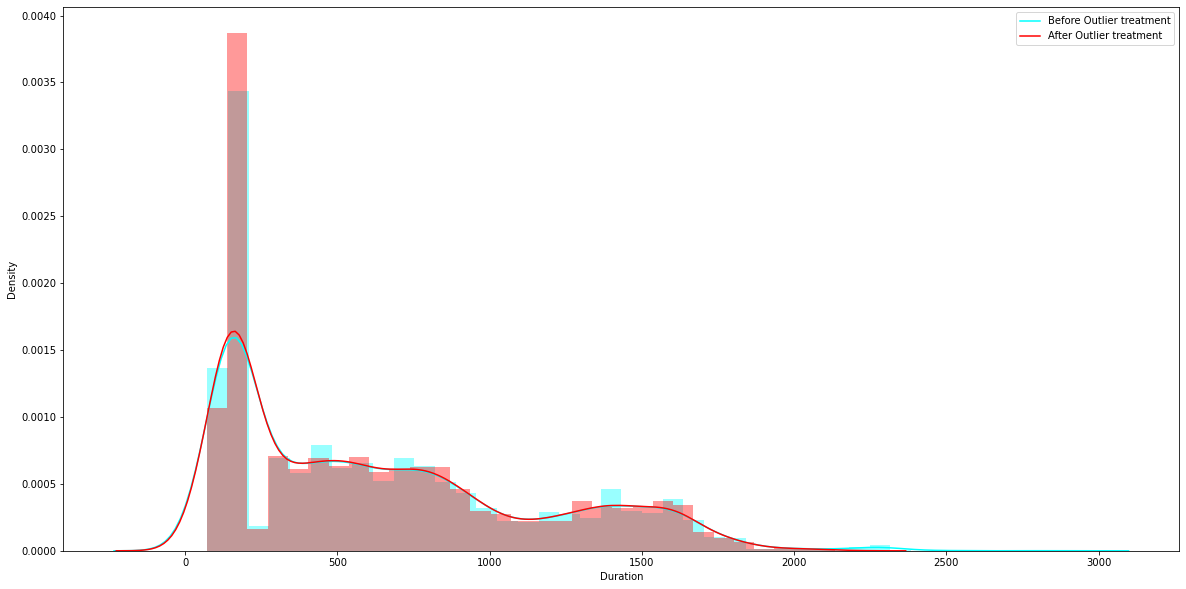

In [78]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['Duration'],color='cyan',kde=True)
sns.distplot(data['Duration'],color='red',kde=True)
plt.legend(['Before Outlier treatment','After Outlier treatment'])
plt.show()

* Lets remove outliers with zscore

In [79]:

df.shape

(10682, 18)

In [80]:
z=np.abs(zscore(df[['Duration']]))
df=df[(z<3).all(axis=1)]


In [81]:
df.shape

(10616, 18)

In [82]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,Quarter,Month,day,week,Dep_hour,Dep_min,Arrival_Hour,Arrival_min,Arrival_day
0,3,0,5,18,170,4,7,3897,24,1,3,3,12,22,20,1,10,0
1,1,3,0,84,445,1,7,7662,1,2,5,6,18,5,50,13,15,1
2,4,2,1,118,1140,1,7,13882,9,2,6,3,23,9,25,4,25,0
3,3,3,0,91,325,0,7,6218,12,2,5,3,19,18,5,23,30,1
4,3,0,5,29,285,0,7,13302,1,1,3,0,9,16,50,21,35,1


* Correlation Analysis of variables

In [83]:
cor=df.corr().abs()

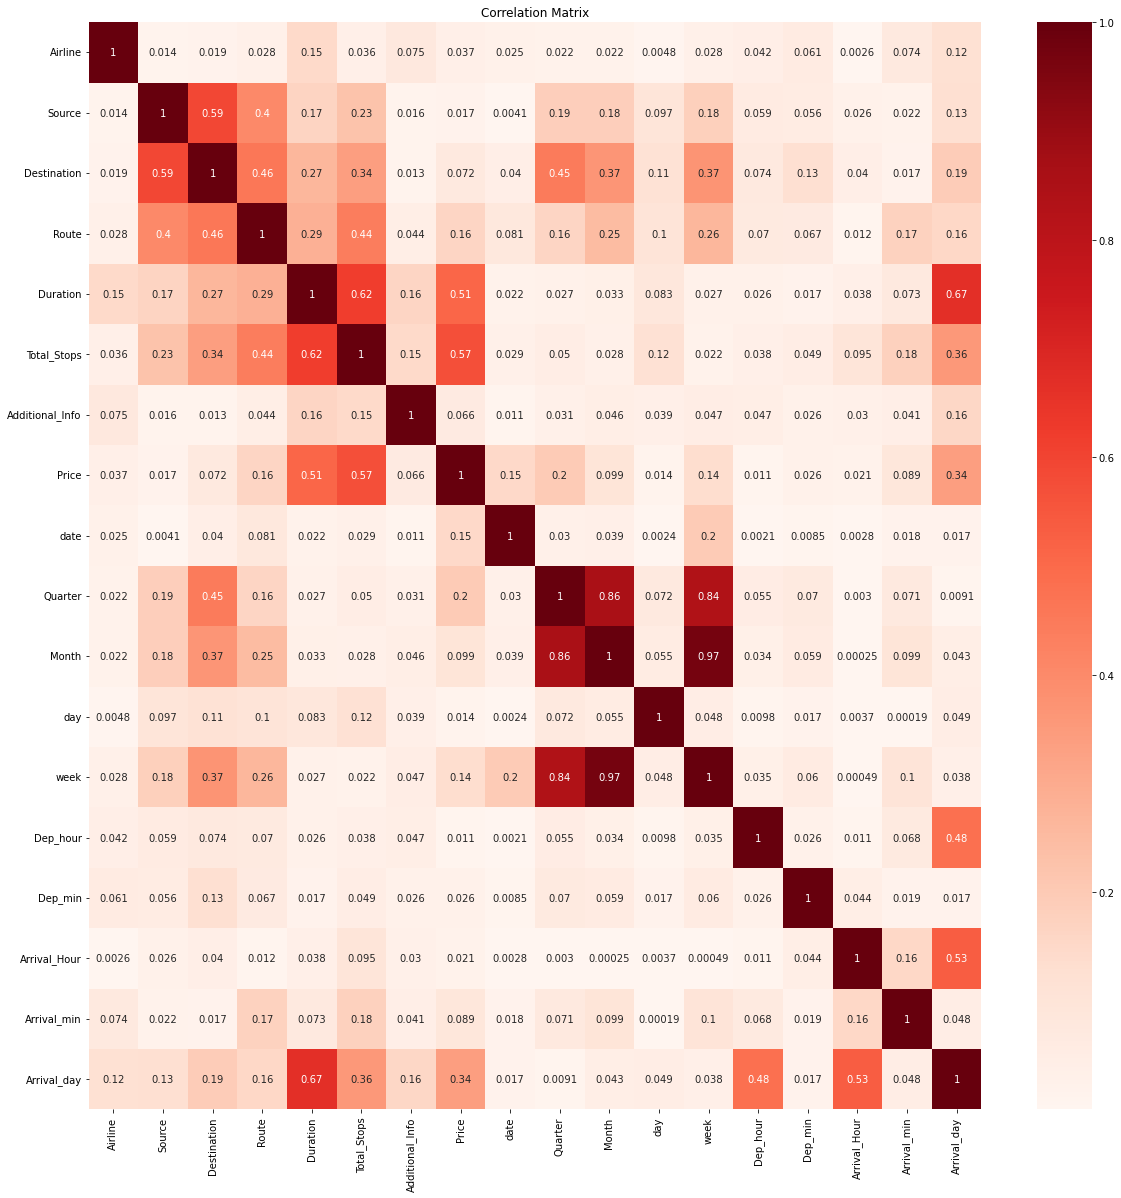

In [84]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True,cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

1] Month and week have very high correlation of 0.97.

2] Quarter and week have high correlation of 0.84.

3] Month and Quarter have high correlation of 0.86 with each other.

4] Total_Stops with Duration have correlaton of 0.62 .

5] Arriaval _day and Duration has correlation of 0.67 . 


* Months with week .

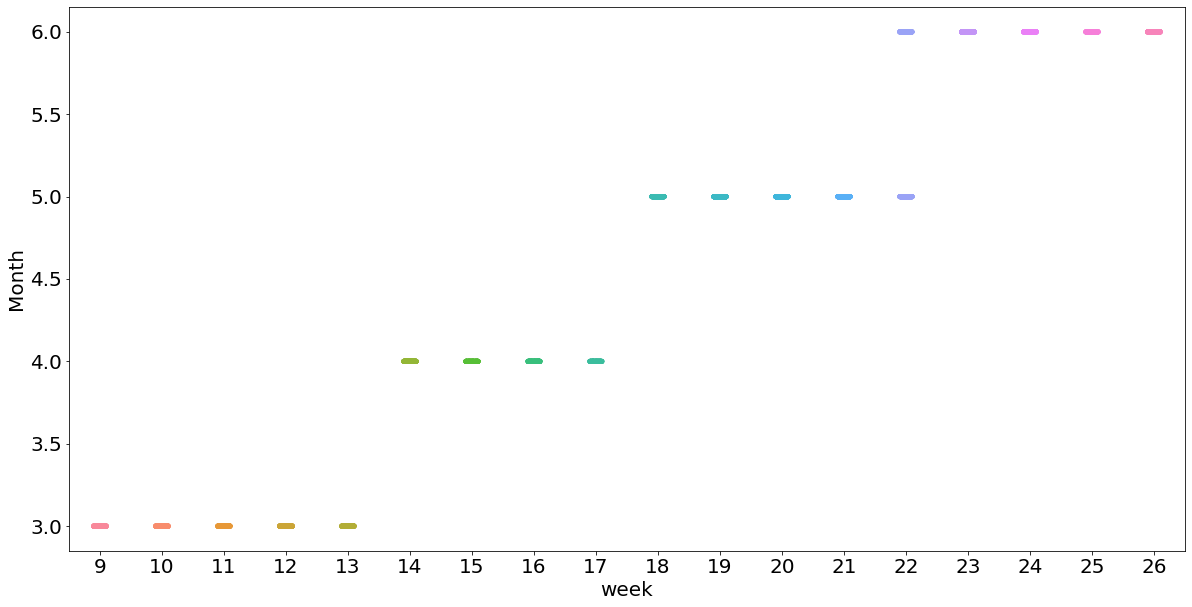

<Figure size 432x288 with 0 Axes>

In [85]:
plt.figure(figsize=(20,10))
sns.set_palette('bright')
sns.stripplot(y=df['Month'],x=df['week'])
plt.ylabel("Month",fontsize=20)
plt.xlabel("week",fontsize=20)
plt.yticks(fontsize=20)  
plt.xticks(fontsize=20)  
plt.show()
plt.tight_layout()

* Week of year have strong correlation with month of year. As Month changes week changes simultaneously.

* Quarter with week

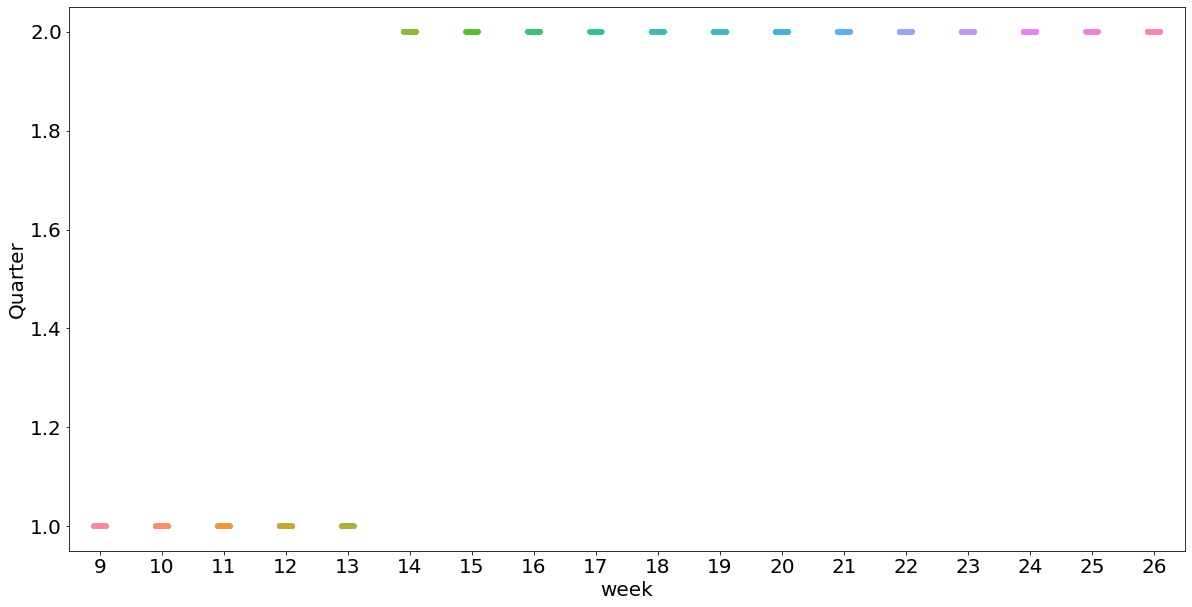

<Figure size 432x288 with 0 Axes>

In [86]:
plt.figure(figsize=(20,10))
sns.stripplot(y=df['Quarter'],x=df['week'])
plt.ylabel("Quarter",fontsize=20)
plt.xlabel("week",fontsize=20)
plt.yticks(fontsize=20)  
plt.xticks(fontsize=20)  
plt.show()
plt.tight_layout()

* Upto 13 weeks of year comes under First quarter and next 13 week comes under second quarter this relationship has formed multicollnearity 

* MOnth with Quarter 

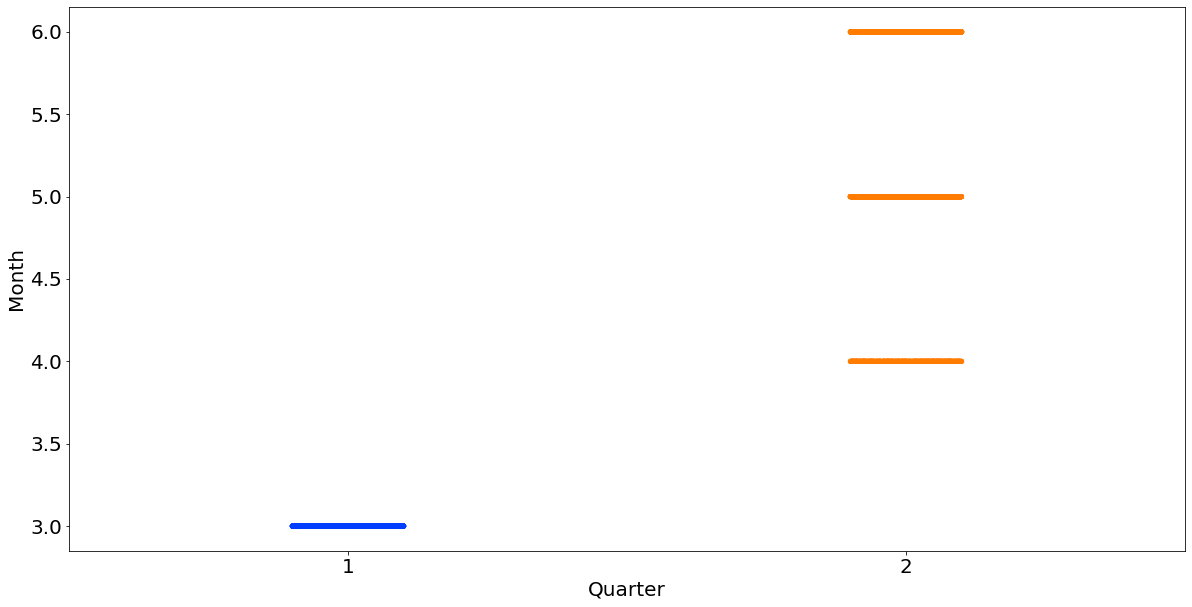

<Figure size 432x288 with 0 Axes>

In [87]:
plt.figure(figsize=(20,10))
sns.set_palette('bright')
sns.stripplot(y=df['Month'],x=df['Quarter'])
plt.ylabel("Month",fontsize=20)
plt.xlabel("Quarter",fontsize=20)
plt.yticks(fontsize=20)  
plt.xticks(fontsize=20)  
plt.show()
plt.tight_layout()

Observation:
    
    1] AS March comes Under First Quarter of year and April may and June comes under second quarter of year this relatioship is form Multicollinearity.

* Duration with Total_Stops.

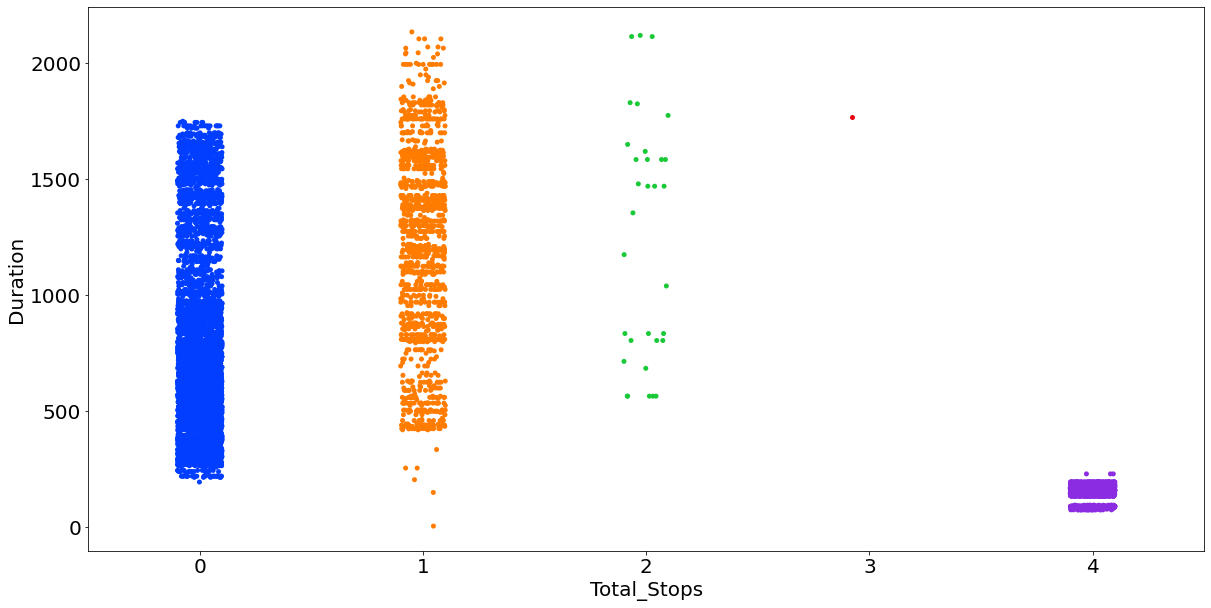

<Figure size 432x288 with 0 Axes>

In [88]:
plt.figure(figsize=(20,10))
sns.set_palette('bright')
sns.stripplot(y=df['Duration'],x=df['Total_Stops'])
plt.ylabel("Duration",fontsize=20)
plt.xlabel("Total_Stops",fontsize=20)
plt.yticks(fontsize=20)  
plt.xticks(fontsize=20)  
plt.show()
plt.tight_layout()

Observation :
    
1] There is relationship  in flights duration with Total_stops  can be observed.

* Duration with Arrival_day

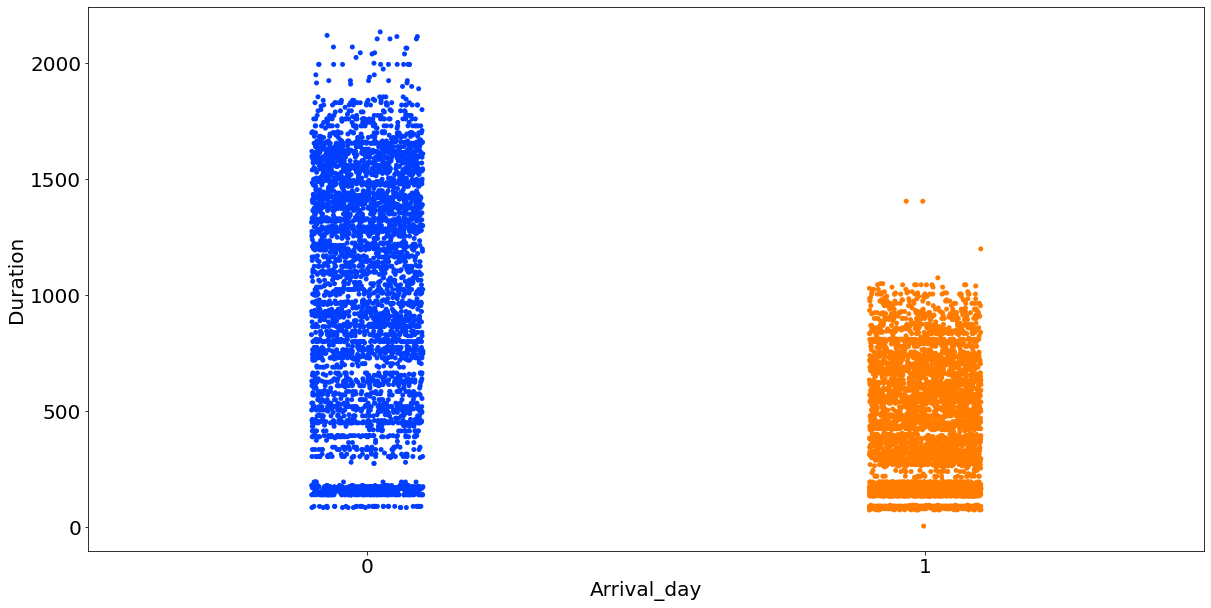

<Figure size 432x288 with 0 Axes>

In [90]:
plt.figure(figsize=(20,10))
sns.set_palette('bright')
sns.stripplot(y=df['Duration'],x=df['Arrival_day'])
plt.ylabel("Duration",fontsize=20)
plt.xlabel("Arrival_day",fontsize=20)
plt.yticks(fontsize=20)  
plt.xticks(fontsize=20)  
plt.show()
plt.tight_layout()

Observation :

1]  Duration of flghts to arrival is high range when arrival is not same day,this relatonship is exhibited significantly.

* Correlation with Price label

In [91]:
cor_label=(df.drop('Price',axis=1)).corrwith(df['Price']).abs()
cor_label

Airline            0.036918
Source             0.016719
Destination        0.072300
Route              0.163666
Duration           0.510554
Total_Stops        0.572460
Additional_Info    0.065654
date               0.151998
Quarter            0.196710
Month              0.099088
day                0.014495
week               0.135436
Dep_hour           0.011411
Dep_min            0.025551
Arrival_Hour       0.021087
Arrival_min        0.088909
Arrival_day        0.339254
dtype: float64

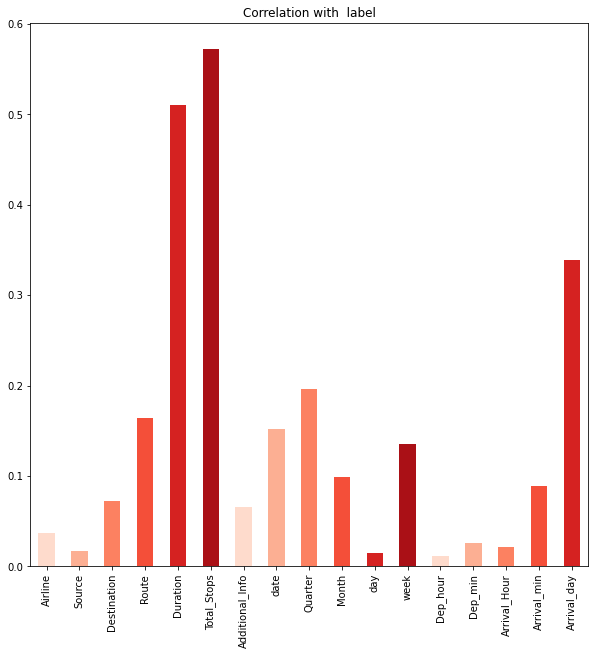

In [92]:
plt.figure(figsize=(10,10))
cor_label.plot(kind="bar",color=sns.color_palette('Reds'))
plt.title("Correlation with  label")
plt.show()

1]  day source Airline Dep_hour,Dep_min ,Arrival_hour have very low corelation with Target.

2] Duration ,Total_Stops and Arrival_day has highest correaltion with target among other features.

* Analyse Multicollinearity with Variance Inflation Factor,Threshold for vif score is defined as 10 


In [93]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor

Predictors1=df.drop(columns=['Price'],axis=1)
predictor1=Predictors1.to_numpy()

VIF1=pd.DataFrame()
VIF1["Features"]=Predictors1.columns
VIF1["vif_scores"]=[variance_inflation_factor(predictor1,i) for i in range(Predictors1.shape[1])]
VIF1.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
9,Month,3363.761988
11,week,2783.765335
16,Arrival_day,93.333639
8,Quarter,77.532325
14,Arrival_Hour,65.226796
6,Additional_Info,60.665060
12,Dep_hour,51.733896
4,Duration,45.359158
7,date,43.071793
3,Route,8.481633


* Analyse vif score after eliminating Month

In [94]:
Predictors2=df.drop(columns=['Price','Month'],axis=1)
predictor2=Predictors2.to_numpy()
VIF2=pd.DataFrame()
VIF2["Features"]=Predictors2.columns
VIF2["vif_scores"]=[variance_inflation_factor(predictor2,i) for i in range(Predictors2.shape[1])]
VIF2.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
8,Quarter,77.296540
15,Arrival_day,59.583428
10,week,59.151436
6,Additional_Info,56.039288
13,Arrival_Hour,45.445359
11,Dep_hour,32.574663
4,Duration,27.215480
3,Route,8.465785
1,Source,5.950568
7,date,4.325968


* Analyse vif score after eliminating Quarter

In [95]:
Predictors3=df.drop(columns=['Price','Month','Quarter'],axis=1)
predictor3=Predictors3.to_numpy()
VIF3=pd.DataFrame()
VIF3["Features"]=Predictors3.columns
VIF3["vif_scores"]=[variance_inflation_factor(predictor3,i) for i in range(Predictors3.shape[1])]
VIF3.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
6,Additional_Info,55.496125
14,Arrival_day,54.625185
12,Arrival_Hour,42.577982
10,Dep_hour,29.691801
4,Duration,24.937403
9,week,16.129713
3,Route,8.320965
1,Source,5.931512
0,Airline,4.002340
7,date,3.716537


* Analyse vif score after eliminating Additional_Info

In [96]:
Predictors4=df.drop(columns=['Price','Month','Quarter','Additional_Info'],axis=1)
predictor4=Predictors4.to_numpy()
VIF4=pd.DataFrame()
VIF4["Features"]=Predictors4.columns
VIF4["vif_scores"]=[variance_inflation_factor(predictor4,i) for i in range(Predictors4.shape[1])]
VIF4.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
13,Arrival_day,31.336701
11,Arrival_Hour,29.829830
9,Dep_hour,17.289828
8,week,16.097377
4,Duration,14.535424
3,Route,8.095903
1,Source,5.926595
0,Airline,3.989185
6,date,3.716098
7,day,3.667153


* Analyse vif score after eliminating Arrival_day

In [97]:
Predictors5=df.drop(columns=['Price','Month','Quarter','Additional_Info','Arrival_day'],axis=1)
predictor5=Predictors5.to_numpy()
VIF5=pd.DataFrame()
VIF5["Features"]=Predictors5.columns
VIF5["vif_scores"]=[variance_inflation_factor(predictor5,i) for i in range(Predictors5.shape[1])]
VIF5.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
8,week,12.839820
3,Route,7.439979
1,Source,5.571853
9,Dep_hour,5.471149
11,Arrival_Hour,4.468139
4,Duration,4.018763
0,Airline,3.745337
6,date,3.686120
7,day,3.483140
12,Arrival_min,3.249910


* Analyse vif score after eliminating week

In [98]:
Predictors6=df.drop(columns=['Price','Month','Quarter','Additional_Info','Arrival_day','week'],axis=1)
predictor6=Predictors6.to_numpy()
VIF6=pd.DataFrame()
VIF6["Features"]=Predictors6.columns
VIF6["vif_scores"]=[variance_inflation_factor(predictor6,i) for i in range(Predictors6.shape[1])]
VIF6.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
3,Route,6.457102
1,Source,5.519667
8,Dep_hour,5.253064
10,Arrival_Hour,4.334484
4,Duration,3.870602
0,Airline,3.627647
7,day,3.477650
6,date,3.440995
11,Arrival_min,3.237428
5,Total_Stops,2.782388


* It is required to remove 5 feature s from dataset to handle issue of Multicollinearity which causes model performance.

* Analysis for Skewness in  continuous features features.


In [99]:
df[['Duration']].skew()

Duration    0.774576
dtype: float64

* Analysis with various transformation to remove skewness in Duration feature which is only continuous feature..

In [100]:
data=df.copy()

In [101]:
from sklearn.preprocessing import PowerTransformer
transform1=pd.DataFrame()
pwr1=PowerTransformer(method='box-cox')
transform1[['Duration']]=pwr1.fit_transform(data[['Duration']])
transform1[['Duration']].skew()

Duration   -0.050049
dtype: float64

* Sqaure root transformation

In [102]:
transform2=pd.DataFrame()
transform2=np.sqrt(data[['Duration']])
transform2.skew()


Duration    0.308886
dtype: float64

* Cuberoot transformation

In [103]:
transform3=pd.DataFrame()
transform3=np.log(data[['Duration']])
transform3.skew()

Duration   -0.182181
dtype: float64

* Power Transformation with yeo-johnson

In [104]:

transform4=pd.DataFrame()
pwr2=PowerTransformer(method='yeo-johnson')
transform4[['Duration']]=pwr2.fit_transform(data[['Duration']])
transform4[['Duration']].skew()

Duration   -0.049276
dtype: float64

* Out of all above transformation Power Transformer with yeo-johnson works betterr.

Lets transform Duration feature  with Power Transformer with yeo-johnson

In [105]:
power=PowerTransformer('yeo-johnson')
df[['Duration']]=power.fit_transform(df[['Duration']])

* Analyse skewness after transformation.

In [106]:
df[['Duration']].skew()

Duration   -0.049276
dtype: float64

* Skewness has been removed from features can be observed from graph

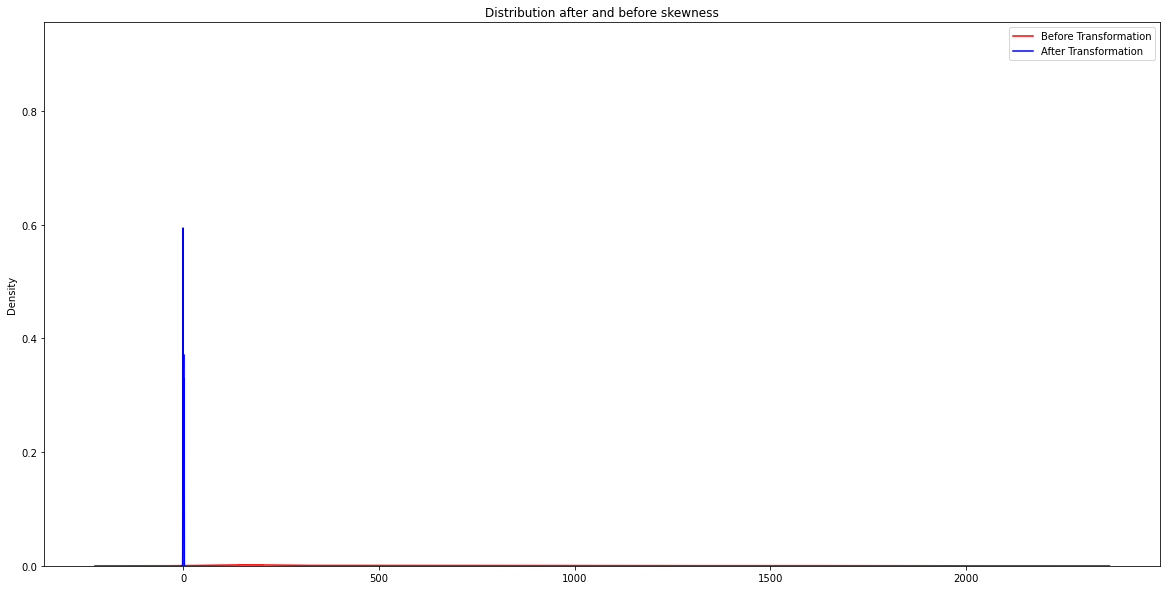

In [107]:

    
fig=plt.figure(figsize=(20,10))
sns.distplot(data[['Duration']],color='red',kde=True)
sns.distplot(df[['Duration']],color='blue',kde=True)
plt.title('Distribution after and before skewness')
plt.legend(['Before Transformation','After Transformation'])
plt.show()   
    

* Skewness has been removed from dataset.

* Splitting dataset into feature and label

In [108]:
x1=df.drop('Price',axis=1)
y1=df.Price

In [109]:
print('x1 shape is ',x1.shape)
print('y1 shape is ',y1.shape)

x1 shape is  (10616, 17)
y1 shape is  (10616,)


* Standadization of features.

In [110]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x1)

In [111]:
x_scaled.shape

(10616, 17)

1] As feature have less correlation with label hence to handle this scenario of low correlation to extract highly correlated data  from features PCA can be effective solution.

2] PCA analysis can give eigenvalues and eigenvecotors which will handle Multicollinearity in highky effective way. 

In [112]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_scaled)

array([[ 3.82675371e+00,  6.31609886e-01,  2.71612804e+00, ...,
        -1.00488980e-01, -3.91898607e-02, -5.47164001e-02],
       [-7.56299187e-01, -8.43005340e-02, -1.44855726e+00, ...,
         1.10533208e-01, -1.11978088e-01,  7.59543844e-03],
       [-2.02575714e+00,  4.08263921e-01,  8.23446984e-01, ...,
        -1.61984185e-01, -6.31135937e-02, -5.57980806e-02],
       ...,
       [ 2.01918650e+00, -1.92348009e+00,  2.82853566e-01, ...,
         5.42863734e-01, -4.87803194e-04, -4.41523073e-02],
       [ 4.82068733e+00, -6.86771310e-01, -2.15458189e-01, ...,
        -2.12733987e-01, -3.93318937e-02,  1.01612223e-03],
       [-5.87286466e-01, -2.86375157e-01, -1.39684362e+00, ...,
         3.07828281e-01, -1.10345652e-01, -1.38567908e-02]])

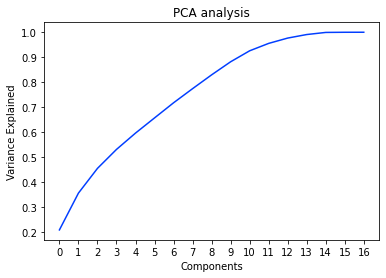

In [113]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance Explained')
plt.title('PCA analysis')
plt.xticks(range(0,17))
plt.show()

In [114]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.208760
1     0.356079
2     0.455067
3     0.530955
4     0.596321
5     0.657073
6     0.717614
7     0.774165
8     0.829417
9     0.881774
10    0.925739
11    0.955367
12    0.976667
13    0.990832
14    0.999265
15    0.999917
16    1.000000
dtype: float64

* The 12 components of PCA explains 95.53 % variance which willbe used for model building

In [115]:
pca1=PCA(n_components=12)
dim1=pca1.fit_transform(x_scaled)
x_dim1=pd.DataFrame(dim1,columns=[('PC{}').format(i) for i in range(1,13)])
x_dim1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,3.826754,0.631610,2.716128,0.524933,0.938081,-1.331800,0.531017,-1.383459,-1.252111,-0.784164,-1.024367,0.023513
1,-0.756299,-0.084301,-1.448557,-0.756922,-1.770794,0.090688,-1.518232,1.438183,-0.932677,0.057206,-0.991807,-0.471344
2,-2.025757,0.408264,0.823447,0.131178,0.212265,-0.243362,-1.796647,0.012010,-0.148020,-0.610377,0.349359,0.361100
3,-1.135388,-0.328351,-1.009049,-1.146120,-0.835639,0.757929,1.174155,-0.999090,0.418587,0.253854,0.144322,0.205560
4,4.163877,0.807491,-0.179041,1.438200,-2.013014,0.616533,0.216446,-0.190842,0.669302,-0.801816,1.306788,0.609827
...,...,...,...,...,...,...,...,...,...,...,...,...
10611,0.630827,-0.878289,-0.402618,-1.618511,-2.606008,-0.231883,1.428548,1.056199,-0.841753,-0.160695,-1.069538,-0.120588
10612,0.387809,-1.324234,-0.369298,-1.121455,-1.407195,-1.534710,2.520908,0.110693,0.395246,-0.575373,-0.862941,-0.465279
10613,2.019187,-1.923480,0.282854,0.441977,0.803079,-1.284846,-0.147570,-0.789845,0.174451,0.333714,-0.123677,-1.146066
10614,4.820687,-0.686771,-0.215458,1.496593,1.049636,1.803848,-0.172976,-0.168465,-0.091346,-2.125925,0.712966,-0.205175


In [116]:
x_dim1.shape

(10616, 12)

In [117]:
y1.shape

(10616,)

* Training algorithms 

In [118]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score 
from sklearn.model_selection import cross_val_score

* spliting dataset into train test set

In [119]:
maxR2=0
maxRn=0
for i  in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_dim1,y1,test_size=0.2,random_state=i)
    regr=LinearRegression()
    regr.fit(x_train,y_train)
    r2=regr.score(x_test,y_test)
    print("R squared ",r2,'Random sate ',i)
    
    if r2>maxR2:
        maxR2=r2
        maxRn=i
        print("R-squared",maxR2,"random_state",i)
        

R squared  0.4442388211503092 Random sate  1
R-squared 0.4442388211503092 random_state 1
R squared  0.4303192255067476 Random sate  2
R squared  0.45150971945425544 Random sate  3
R-squared 0.45150971945425544 random_state 3
R squared  0.4260186562620347 Random sate  4
R squared  0.402460505178039 Random sate  5
R squared  0.4158958624435898 Random sate  6
R squared  0.463245736499304 Random sate  7
R-squared 0.463245736499304 random_state 7
R squared  0.4431451996315341 Random sate  8
R squared  0.42794878537738146 Random sate  9
R squared  0.45128353571694046 Random sate  10
R squared  0.3869176446560788 Random sate  11
R squared  0.4399700982033624 Random sate  12
R squared  0.3904179461164978 Random sate  13
R squared  0.41463592420212303 Random sate  14
R squared  0.46215603223813806 Random sate  15
R squared  0.41240224319863317 Random sate  16
R squared  0.4391967095934245 Random sate  17
R squared  0.42268479508198054 Random sate  18
R squared  0.44256783870623606 Random sate  

In [120]:
print("Maximum R squared obtained  is ",maxR2,'at random state',maxRn) 

Maximum R squared obtained  is  0.4826677728948682 at random state 31


In [121]:
x_train,x_test,y_train,y_test=train_test_split(x_dim1,y1,test_size=0.20,random_state=31)

In [122]:
def Reg_eval(regr,x_train,y_train,x_test,y_test,train=True):
    if train==True:
        print('********** Training Evaluation *******************')
        ytrain_pred=regr.predict(x_train)
        
        R2_train=r2_score(y_train,ytrain_pred)
       
        RMSE_train=np.sqrt(mean_squared_error(y_train,ytrain_pred))
        print("\nThe R squared for {0}  for Train data  is {1} ".format(str(regr),R2_train))
        print("\nThe Root mean squared error for {0}  for Train data is {1} ".format(str(regr),RMSE_train))
        
        
        
    elif train==False:
        print('\n********** Testing  Evaluation *******************')
        ytest_pred=regr.predict(x_test)
        R2_test=r2_score(y_test,ytest_pred)
        RMSE_test=np.sqrt(mean_squared_error(y_test,ytest_pred))
        print(" \nThe R squared for {0}  for Test data is {1} ".format(str(regr),R2_test))
        print("\nThe Root mean squared error for {0}  Test data  is {1} ".format(str(regr),RMSE_test))

def Reg_plot(regr,x_test,y_test):
    y_pred_test=regr.predict(x_test)
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=y_test,y=y_pred_test,color='lightgreen')
    plt.plot(y_test,y_test,color='red')
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted sales")
    plt.title("{} Prediction VS Actual data".format(type(regr)))
    plt.show()

* Linear Regression

In [123]:
LinR1=LinearRegression()
LinR1.fit(x_train,y_train)

Reg_eval(LinR1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(LinR1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for LinearRegression()  for Train data  is 0.41899299669080303 

The Root mean squared error for LinearRegression()  for Train data is 3574.0547046229653 

********** Testing  Evaluation *******************
 
The R squared for LinearRegression()  for Test data is 0.4826677728948682 

The Root mean squared error for LinearRegression()  Test data  is 3072.1785272322522 


* Lasso Rgression 

In [124]:
las1=Lasso(alpha=0.001,random_state=116)
las1.fit(x_train,y_train)

Reg_eval(las1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(las1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for Lasso(alpha=0.001, random_state=116)  for Train data  is 0.4189929966902839 

The Root mean squared error for Lasso(alpha=0.001, random_state=116)  for Train data is 3574.0547046245624 

********** Testing  Evaluation *******************
 
The R squared for Lasso(alpha=0.001, random_state=116)  for Test data is 0.4826678389196062 

The Root mean squared error for Lasso(alpha=0.001, random_state=116)  Test data  is 3072.1783311882227 


* Ridge Regression

In [125]:
rid1=Ridge(alpha=0.01,random_state=116)
rid1.fit(x_train,y_train)

Reg_eval(rid1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(rid1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for Ridge(alpha=0.01, random_state=116)  for Train data  is 0.41899299669056367 

The Root mean squared error for Ridge(alpha=0.01, random_state=116)  for Train data is 3574.054704623702 

********** Testing  Evaluation *******************
 
The R squared for Ridge(alpha=0.01, random_state=116)  for Test data is 0.48266780188893155 

The Root mean squared error for Ridge(alpha=0.01, random_state=116)  Test data  is 3072.178441141598 


* DecisionTree Regressor

In [126]:
dt1=DecisionTreeRegressor(min_samples_split=15,min_samples_leaf=15,random_state=17,max_depth=18)
dt1.fit(x_train,y_train)

Reg_eval(dt1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(dt1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for DecisionTreeRegressor(max_depth=18, min_samples_leaf=15, min_samples_split=15,
                      random_state=17)  for Train data  is 0.7414082253323917 

The Root mean squared error for DecisionTreeRegressor(max_depth=18, min_samples_leaf=15, min_samples_split=15,
                      random_state=17)  for Train data is 2384.3931485100834 

********** Testing  Evaluation *******************
 
The R squared for DecisionTreeRegressor(max_depth=18, min_samples_leaf=15, min_samples_split=15,
                      random_state=17)  for Test data is 0.6300014186570857 

The Root mean squared error for DecisionTreeRegressor(max_depth=18, min_samples_leaf=15, min_samples_split=15,
                      random_state=17)  Test data  is 2598.1349917435296 


* GradientBoostingClassifier

In [127]:
gbdt1=GradientBoostingRegressor(learning_rate=0.234,min_samples_split=35,max_depth=35,min_samples_leaf=25,random_state=10)
gbdt1.fit(x_train,y_train)

Reg_eval(gbdt1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(gbdt1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for GradientBoostingRegressor(learning_rate=0.234, max_depth=35,
                          min_samples_leaf=25, min_samples_split=35,
                          random_state=10)  for Train data  is 0.9833788661330264 

The Root mean squared error for GradientBoostingRegressor(learning_rate=0.234, max_depth=35,
                          min_samples_leaf=25, min_samples_split=35,
                          random_state=10)  for Train data is 604.5063059103124 

********** Testing  Evaluation *******************
 
The R squared for GradientBoostingRegressor(learning_rate=0.234, max_depth=35,
                          min_samples_leaf=25, min_samples_split=35,
                          random_state=10)  for Test data is 0.7845038942656978 

The Root mean squared error for GradientBoostingRegressor(learning_rate=0.234, max_depth=35,
                          min_samples_leaf=25, min_samples_split=35,
                          r

* RandoForestRegressor

In [128]:
rf1=RandomForestRegressor(max_depth=None,min_samples_leaf=1, min_samples_split=2,random_state=10)
rf1.fit(x_train,y_train)

Reg_eval(rf1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(rf1,x_train,y_train,x_test,y_test,train=False)



********** Training Evaluation *******************

The R squared for RandomForestRegressor(random_state=10)  for Train data  is 0.9586109854755918 

The Root mean squared error for RandomForestRegressor(random_state=10)  for Train data is 953.9224172711608 

********** Testing  Evaluation *******************
 
The R squared for RandomForestRegressor(random_state=10)  for Test data is 0.7864977414702999 

The Root mean squared error for RandomForestRegressor(random_state=10)  Test data  is 1973.6171909752038 


* XGB Regressor

In [129]:
xgr1=XGBRegressor(booster='gbtree',learning_rate=0.234,random_state=15)
xgr1.fit(x_train,y_train)

Reg_eval(xgr1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(xgr1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.234, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=15,
             reg_alpha=0, reg_lambda=1, ...)  for Train data  is 0.9225083906582677 

The Root mean squared error for XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=N

* Evaluation of estimators

In [130]:
regressors=[LinR1,las1,rid1,gbdt1,xgr1,rf1,dt1]
Names=['Linear Regressor','Lasso Regressor','Ridge Regressor','GBDTRegressor',
       'XGBRegressor',"RandomForestRegressor","DecisionTreeRegressor"]

In [131]:
scores_train= []
scores_test=[]
rmse_scores=[]
for reg in regressors:
    ypred_train=reg.predict(x_train)
    ypred_test=reg.predict(x_test)
    trainsc = r2_score(y_train,ypred_train)
    testsc=r2_score(y_test,ypred_test)
    rmse=np.sqrt(mean_squared_error(y_test,ypred_test))
    
    scores_train.append(trainsc)
    scores_test.append(testsc)
    rmse_scores.append(rmse)

* Selecting best CV parameter for cross validation

In [132]:
for i in [3,5,7,8,10]:
    cv=cross_val_score(LinearRegression(),x_dim1,y1,cv=i,scoring='r2')
    print("R2 square is {0} for cv={1}".format(cv.mean(),i))

R2 square is 0.42912433933780153 for cv=3
R2 square is 0.42848593281080927 for cv=5
R2 square is 0.4301348537511764 for cv=7
R2 square is 0.4297813152971388 for cv=8
R2 square is 0.43207231824463754 for cv=10


* Generalized score obtained at cv=5

# Cross Validation 

In [133]:
from sklearn.model_selection import cross_val_score
cv_scores_mean=[]
cv_scores=[]
for reg in regressors:
    scr=cross_val_score(reg,x_dim1,y1,cv=5,scoring="r2")
    cv_scores.append(scr)   
    cv_scores_mean.append(scr.mean())
cv_scores_mean   

[0.42848593281080927,
 0.42848594430814657,
 0.4284859360033332,
 0.7349701879068057,
 0.7113712601386242,
 0.7289724800700295,
 0.5720423313625123]

In [134]:
EvalDF=pd.DataFrame({'Regressor':Names,'Train R2 square':scores_train,'Test R2 square':scores_test,
                      'RMSE':rmse_scores,'Validation score':cv_scores_mean})

In [135]:
EvalDF["criteria of selecting best model"]=EvalDF['Test R2 square']-EvalDF['Validation score']

In [136]:
EvalDF.sort_values(by="criteria of selecting best model",ascending=True)



,Regressor,Train R2 square,Test R2 square,RMSE,Validation score,criteria of selecting best model
4,XGBRegressor,0.922508,0.760832,2088.880197,0.711371,0.049460
3,GBDTRegressor,0.983379,0.784504,1982.811348,0.734970,0.049534
0,Linear Regressor,0.418993,0.482668,3072.178527,0.428486,0.054182
2,Ridge Regressor,0.418993,0.482668,3072.178441,0.428486,0.054182
1,Lasso Regressor,0.418993,0.482668,3072.178331,0.428486,0.054182
5,RandomForestRegressor,0.958611,0.786498,1973.617191,0.728972,0.057525
6,DecisionTreeRegressor,0.741408,0.630001,2598.134992,0.572042,0.057959


* Hyperparameter tuning with GridsearchCV


In [137]:
from sklearn.model_selection import GridSearchCV

* Hyperparameter tunning of XGRegressor

In [138]:
param2={'gamma':[0.1,0.5,1.0],
                 'learning_rate':[0.07,0.09,0.234,0.3],
                   'max_depth' :[30,35,40,50,60]
                 }


grid2=GridSearchCV(XGBRegressor(random_state=10),param_grid=param2,cv=5)
grid2.fit(x_train,y_train)  
print(grid2.best_params_)      


{'gamma': 0.5, 'learning_rate': 0.09, 'max_depth': 35}


In [139]:
xgr2=grid2.best_estimator_
xgr2.fit(x_train,y_train)

Reg_eval(xgr2,x_train,y_train,x_test,y_test,train=True)
Reg_eval(xgr2,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.09, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=35, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=10,
             reg_alpha=0, reg_lambda=1, ...)  for Train data  is 0.9958490187929129 

The Root mean squared error for XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds

# Final Model 


* xgr2 is final model with hyperparameter tunning of XGBRegressor having hyperparameters as eta: 0.4, learning_rate: 0.09, max_depth: 35 random_state=10

     

1] R2 score of test data = 0.7962

2] RMSE of Test data =1928.526



* Ploting of Actual values VS Prediction values of Price

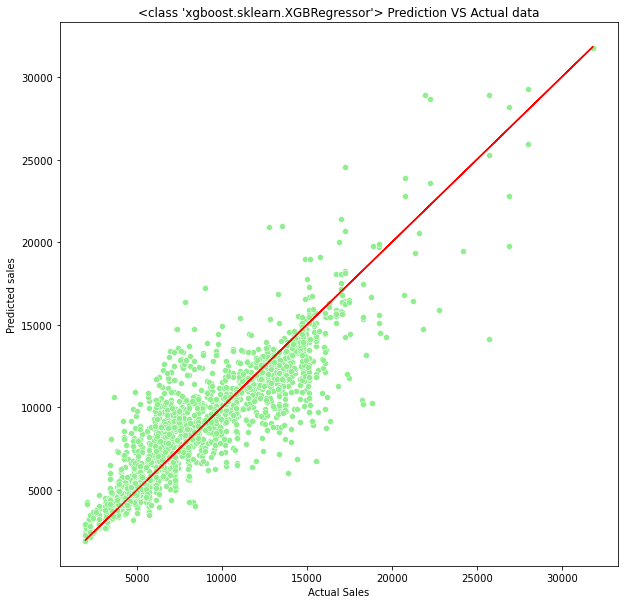

In [140]:
Reg_plot(xgr2,x_test,y_test)

* Plotting Distribution Error in Predicted and Actual values 

In [141]:
pred=xgr2.predict(x_test)

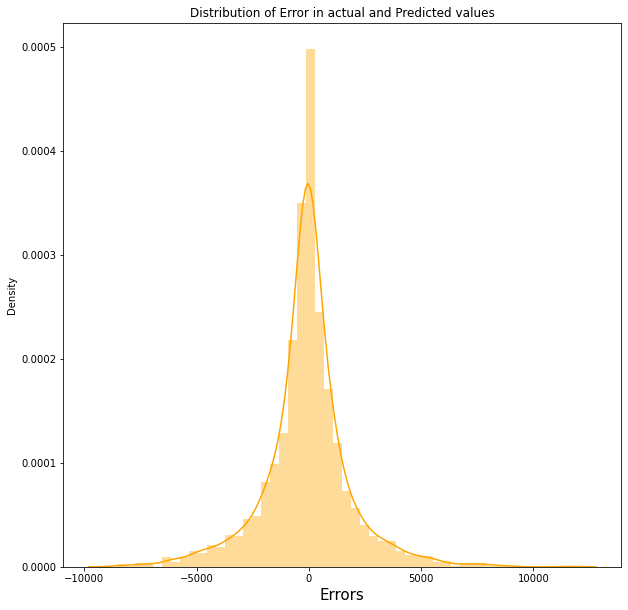

In [142]:
plt.figure(figsize=(10,10))
sns.distplot(y_test-pred,color='orange')
plt.title("Distribution of Error in actual and Predicted values")
plt.xlabel('Errors',fontsize=15)
plt.show()


# Save a Model

In [143]:
import pickle
filename='FlightFarXGR.pkl'
pickle.dump(xgr2 ,open(filename,'wb'))

# Test data for Prediction.

In [144]:
test=data_test.copy()
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [145]:
test.shape

(2671, 10)

In [146]:
test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

* Unique values count  in features

In [147]:
for i in test.columns:
    print(i,":\n")
    print(len(test[i].unique()))
    print('______________________________\n')

Airline :

11
______________________________

Date_of_Journey :

44
______________________________

Source :

5
______________________________

Destination :

6
______________________________

Route :

100
______________________________

Dep_Time :

199
______________________________

Arrival_Time :

704
______________________________

Duration :

320
______________________________

Total_Stops :

5
______________________________

Additional_Info :

6
______________________________



* Unique values and Category counts

In [148]:
for i in test.columns:
    print(i,"\n")
    print(test[i].unique())
    print('----------------------------------\n')
    print(test[i].value_counts(),'\n')
    print('----------------------------------\n')

Airline 

['Jet Airways' 'IndiGo' 'Multiple carriers' 'Air Asia' 'Air India'
 'Vistara' 'SpiceJet' 'Vistara Premium economy' 'GoAir'
 'Multiple carriers Premium economy' 'Jet Airways Business']
----------------------------------

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64 

----------------------------------

Date_of_Journey 

['6/06/2019' '12/05/2019' '21/05/2019' '24/06/2019' '12/06/2019'
 '12/03/2019' '1/05/2019' '15/03/2019' '18/05/2019' '21/03/2019'
 '15/06/2019' '15/05/2019' '3/06/2019' '06/03/2019' '24/03/2019'
 '6/03/2019' '9/05/2019' '18/03/2019' '6

1] Route has some different categories which have not trained in model.

2] There are less categories in Additional_Info feature of Test data.

# Feature Creation 

from above analysis we can observed that there are some categories in Train set are not in Prediction set and Vice versa can be observed 

1] IF Categories in Train set are not in Prediction Set, There is no need of any manipuation with prediction data.

2] While If Categories in Prediction set but not in Train set Then it is mendatory to eliminate the datapoints with unknown category as Model isnot trained with these categories.It will throw and error in encoding like in Route feature.

* The same preprocessing techniques application on test set as applied on trained data during Model buildng.

# 2] date of _journey into datetime

In [149]:
test['Datetime'] = pd.to_datetime(test['Date_of_Journey'],dayfirst=True,yearfirst=False)

In [150]:
test['date']=test['Datetime'].dt.day

In [151]:
test['Quarter']=test['Datetime'].dt.quarter

In [152]:
test['day']=test['Datetime'].dt.day_name()

In [153]:
test['week']=test['Datetime'].dt.week

In [154]:
test['Month']=test['Datetime'].dt.month

# 3] 

In [155]:
test['Dep_hour']=(pd.to_datetime(test['Dep_Time'])).dt.hour
test['Dep_min']=(pd.to_datetime(test['Dep_Time'])).dt.minute

# 4]

In [156]:
test['Arrival_Hour'] = (pd.to_datetime(test['Arrival_Time'])).dt.hour
test['Arrival_min'] = (pd.to_datetime(test['Arrival_Time'])).dt.minute


# 5]

In [157]:
test['Arrival_day']=test['Arrival_Time'].apply(arr)

# 6]

In [158]:
test['Duration']=test['Duration'].apply(dur)

* Prediction  Data After feature Manipulation.

In [159]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Datetime', 'date', 'Quarter', 'day', 'week',
       'Month', 'Dep_hour', 'Dep_min', 'Arrival_Hour', 'Arrival_min',
       'Arrival_day'],
      dtype='object')

In [160]:
test.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,date,Quarter,day,week,Month,Dep_hour,Dep_min,Arrival_Hour,Arrival_min,Arrival_day
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1 stop,No info,...,6,2,Thursday,23,6,17,30,4,25,Not sameday
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1 stop,No info,...,12,2,Sunday,19,5,6,20,10,20,Sameday
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1 stop,In-flight meal not included,...,21,2,Tuesday,21,5,19,15,19,0,Not sameday
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1 stop,No info,...,21,2,Tuesday,21,5,8,0,21,0,Sameday
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,non-stop,No info,...,24,2,Monday,26,6,23,55,2,45,Not sameday
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,1100,1 stop,In-flight meal not included,...,12,2,Wednesday,24,6,18,15,12,35,Not sameday
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,905,1 stop,No info,...,12,1,Tuesday,11,3,7,30,22,35,Sameday
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,315,1 stop,No info,...,1,2,Wednesday,18,5,15,15,20,30,Sameday
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,165,non-stop,No info,...,15,1,Friday,11,3,10,10,12,55,Sameday
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,365,1 stop,No info,...,18,2,Saturday,20,5,16,30,22,35,Sameday


* Test data has 21 feature with newly created features as created in model building.

* Eliminating unneccesary features as features which are removed in Train data

    1] we have created hour and Minute from Dep_Time , So it will be removed.

    2] we have created hour and Minute from Arrival_Time , So it will be removed.

    3] Also eliminating Day_of_Journey and Datetime features.

In [161]:
len(test.columns)

21

In [162]:
test=test.drop(columns=['Date_of_Journey','Datetime','Dep_Time','Arrival_Time'],axis=1)
test.shape

(2671, 17)

* Analysing missing records 

In [163]:
test.isna().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
date               0
Quarter            0
day                0
week               0
Month              0
Dep_hour           0
Dep_min            0
Arrival_Hour       0
Arrival_min        0
Arrival_day        0
dtype: int64

In [164]:
test.isna().sum().sum()

0

* There are not missing records in Prediction set.

* Seprating Numeric and Object datatype features.

In [165]:
num2=[]
obj2=[]
for i in test.columns:
    if test[i].dtype==np.object:
        obj2.append(i)
    else:
        num2.append(i)
print('number of Numeric variable :',len(num2))
print('Numeric varibales :\n\n',num2)
print("-----------------------------------------------------------------------")
print('number of object datatype  variable :',len(obj2))
print('object datatype varibales :\n\n',obj2)


number of Numeric variable : 9
Numeric varibales :

 ['Duration', 'date', 'Quarter', 'week', 'Month', 'Dep_hour', 'Dep_min', 'Arrival_Hour', 'Arrival_min']
-----------------------------------------------------------------------
number of object datatype  variable : 8
object datatype varibales :

 ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info', 'day', 'Arrival_day']


* The routlist contains categories which are inpredictionset but not in Trained model categories of Route feature So this categories will be removed from prediction records as Model cannot make prediction with these records.

In [166]:
routelist

['BLR → TRV → DEL',
 'CCU → IXR → BBI → BOM → BLR',
 'BOM → VGA → TIR → HYD',
 'BOM → IXC → DEL → HYD']

In [167]:
test.drop(test.index[test['Route']=='BLR → TRV → DEL'],axis=0,inplace=True)


In [168]:
test.drop(test.index[test['Route']=='CCU → IXR → BBI → BOM → BLR'],axis=0,inplace=True)


In [169]:
test.drop(test.index[test['Route']=='BOM → VGA → TIR → HYD'],axis=0,inplace=True)


In [170]:
test.drop(test.index[test['Route']=='BOM → IXC → DEL → HYD'],axis=0,inplace=True)


* Reseting index after elimination of rows 

In [171]:
test.reset_index(drop=True)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,date,Quarter,day,week,Month,Dep_hour,Dep_min,Arrival_Hour,Arrival_min,Arrival_day
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,2,Thursday,23,6,17,30,4,25,Not sameday
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,2,Sunday,19,5,6,20,10,20,Sameday
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,2,Tuesday,21,5,19,15,19,0,Not sameday
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,2,Tuesday,21,5,8,0,21,0,Sameday
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,2,Monday,26,6,23,55,2,45,Not sameday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,Air India,Kolkata,Banglore,CCU → DEL → BLR,1435,1 stop,No info,6,2,Thursday,23,6,20,30,20,25,Not sameday
2661,IndiGo,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,27,1,Wednesday,13,3,14,20,16,55,Sameday
2662,Jet Airways,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No info,6,1,Wednesday,10,3,21,50,4,25,Not sameday
2663,Air India,Delhi,Cochin,DEL → BOM → COK,915,1 stop,No info,6,1,Wednesday,10,3,4,0,19,15,Sameday


* Unique Values before encoding

In [172]:
for i in obj:
    print(i,":\n")
    print(test[i].unique())
    print('______________________________\n')

Airline :

['Jet Airways' 'IndiGo' 'Multiple carriers' 'Air Asia' 'Vistara'
 'Air India' 'SpiceJet' 'Vistara Premium economy' 'GoAir'
 'Multiple carriers Premium economy' 'Jet Airways Business']
______________________________

Source :

['Delhi' 'Kolkata' 'Banglore' 'Mumbai' 'Chennai']
______________________________

Destination :

['Cochin' 'Banglore' 'Delhi' 'New Delhi' 'Hyderabad' 'Kolkata']
______________________________

Route :

['DEL → BOM → COK' 'CCU → MAA → BLR' 'BLR → DEL' 'CCU → HYD → BLR'
 'CCU → BLR' 'CCU → BOM → BLR' 'DEL → MAA → BOM → COK' 'DEL → HYD → COK'
 'BLR → BOM → DEL' 'CCU → DEL → BLR' 'DEL → JAI → BOM → COK'
 'DEL → BHO → BOM → COK' 'BOM → HYD' 'CCU → PNQ → BLR' 'MAA → CCU'
 'CCU → BOM → COK → BLR' 'DEL → BLR → COK' 'DEL → HYD → MAA → COK'
 'DEL → MAA → COK' 'CCU → DEL → AMD → BLR' 'DEL → COK'
 'CCU → JAI → BOM → BLR' 'DEL → LKO → COK' 'CCU → IXB → BLR'
 'DEL → CCU → BOM → COK' 'CCU → GAU → DEL → BLR' 'BLR → COK → DEL'
 'BLR → BOM → NAG → DEL' 'CCU → BBI → BOM →

* Encoding features with LabelEncoders.

* Object datatype  columns in Train set is same as ojectdatatype column in prediction set.

In [173]:
obj==obj2

True

In [174]:
obj

['Airline',
 'Source',
 'Destination',
 'Route',
 'Total_Stops',
 'Additional_Info',
 'day',
 'Arrival_day']

In [175]:
for i,j in zip(obj,le_list):
    test[i]=j.transform(test[i])

In [176]:
for i in obj:
    print(i,":\n")
    print(test[i].unique())
    print('______________________________\n')

Airline :

[ 4  3  6  0 10  1  8 11  2  7  5]
______________________________

Source :

[2 3 0 4 1]
______________________________

Destination :

[1 0 2 5 3 4]
______________________________

Route :

[104  90  18  80  64  66 120 111   5  73 116 102  48  93 127  67 103 112
 121  72 106  87 119  82 105  78  17  10  61   0  45 108 115 110  74  20
   4 113  97 124 122  92  25   8   6  95  60  28  85  68  99  33 101  24
   3 107  98  69  31  89 125  16 126  41  65 117 123 109   7   2  51  77
  11   1  76 118  88  91  50  15  35  71  46  75  19   9 114  62  34  29
  59  36  14  63  84  47]
______________________________

Total_Stops :

[0 4 1 2 3]
______________________________

Additional_Info :

[7 5 6 0 3 4]
______________________________

day :

[4 3 5 1 6 0 2]
______________________________

Arrival_day :

[0 1]
______________________________



In [177]:
test.isna().sum().sum()

0

* Analysig Distribution of Duration feature and Outliers.

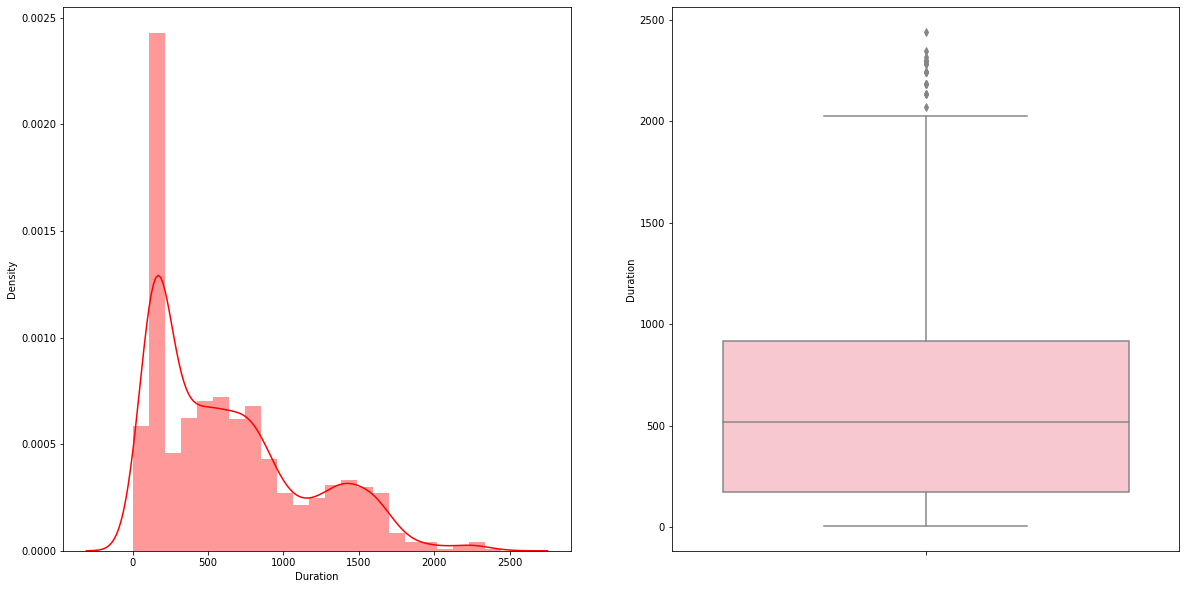

In [178]:
fig=plt.figure(figsize=(20,10))
sns.distplot(test["Duration"],color='red',kde=True,ax=fig.add_subplot(1,2,1))
sns.boxplot(y=test['Duration'],color='pink',ax=fig.add_subplot(1,2,2))
plt.show()


1] There is skewed distributio and Outliers are present in data.

* Power Trasformation with Duration feature as aplied during Training of model.

In [179]:
power=PowerTransformer('yeo-johnson')

test[['Duration']]=power.fit_transform(test[['Duration']])


* Standard scaler applcation as employed in Prediction set.

In [180]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
test_scaled=scaler.fit_transform(test)



* PCA

* Employing of same number of feature components as components employed in Training of Model.

In [181]:
from sklearn.decomposition import PCA

Pc1=PCA(n_components=12)
dim2=Pc1.fit_transform(test_scaled)
test_dim=pd.DataFrame(dim2,columns=[('Pred_PC{}').format(i) for i in range(1,13)])
test_dim

,Pred_PC1,Pred_PC2,Pred_PC3,Pred_PC4,Pred_PC5,Pred_PC6,Pred_PC7,Pred_PC8,Pred_PC9,Pred_PC10,Pred_PC11,Pred_PC12
0,-1.869692,0.569354,1.442767,0.078377,-0.547754,-0.168139,0.906524,0.866180,0.143944,-0.647471,0.192592,0.559062
1,-1.070603,-0.366167,-1.009208,-1.116152,-0.488893,0.236145,0.744692,-0.247055,0.043543,0.578984,-0.533370,-0.381399
2,-1.978640,1.480984,0.124198,1.956661,1.338375,0.364500,-1.478015,-0.054862,0.092356,-0.372467,-1.046269,0.394581
3,-1.426534,-0.154095,-2.221007,0.498861,0.673114,1.088407,0.116544,-0.563916,-0.208675,-1.327139,-0.267121,-0.305957
4,0.469523,-2.064693,3.801781,0.662667,-2.382377,0.177401,-1.689817,0.565883,-0.491431,-0.007298,0.341623,0.167442
...,...,...,...,...,...,...,...,...,...,...,...,...
2660,-2.307450,1.003669,0.668595,-0.127080,-0.612222,-1.868926,-1.031417,0.216773,0.332830,-0.909293,0.191280,-0.438925
2661,2.040486,0.141502,-0.323235,-3.066483,0.638396,1.354914,-2.043771,0.132286,-0.005676,-0.094230,-0.129126,-0.117147
2662,1.331013,2.949829,0.961846,-0.979558,0.202706,-0.218797,0.386864,1.987586,-0.582757,-0.668887,-0.384454,0.775695
2663,1.165885,2.345474,-2.577444,-1.141515,-0.275348,-0.066265,0.591372,-1.028590,1.026428,-0.862421,-1.190101,0.173569


* Prediction with XGBRegrressor

In [182]:
Pred_price=pd.DataFrame(xgr1.predict(test_dim),columns=['Price'])
Pred_price

,Price
0,12113.346680
1,10007.793945
2,11234.405273
3,11287.705078
4,4977.318359
...,...
2660,11353.600586
2661,6852.108887
2662,13145.343750
2663,13942.180664


In [183]:
Pred_price.shape

(2665, 1)

# Concatinating Predicted Price to  origina test.csv and keeping as new DataFrame.

In [184]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [185]:
data_test.shape

(2671, 10)

* Eliminating rows having categories in Route features which have not trained in evaluation model training.

In [186]:
data_test.drop(data_test.index[data_test['Route']=='BLR → TRV → DEL'],axis=0,inplace=True)

data_test.drop(data_test.index[data_test['Route']=='CCU → IXR → BBI → BOM → BLR'],axis=0,inplace=True)
data_test.drop(data_test.index[data_test['Route']=='BOM → VGA → TIR → HYD'],axis=0,inplace=True)

data_test.drop(data_test.index[data_test['Route']=='BOM → IXC → DEL → HYD'],axis=0,inplace=True)




* reseting Index of test data

In [187]:
data_test.reset_index(drop=True)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2660,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2661,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2662,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2663,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [188]:
data_test.shape


(2665, 10)

# New datafrmae.

In [189]:
Prediction_set=data_test.copy()

In [190]:
Prediction_set.shape

(2665, 10)

In [191]:
Prediction_set['Pred_price']=xgr1.predict(test_dim)

In [192]:
Prediction_set.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Pred_price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,12113.346680
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,10007.793945
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,11234.405273
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,11287.705078
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,4977.318359
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included,9956.080078
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info,9179.911133
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info,5185.903809
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info,10750.227539
10,Jet Airways,21/03/2019,Delhi,Cochin,DEL → MAA → BOM → COK,13:55,18:50 22 Mar,28h 55m,2 stops,In-flight meal not included,13925.770508


In [193]:
Prediction_set.to_csv("FlightPricePredWithXGR.csv")